In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Define functions

In [5]:
def make_factor_to_plot_column(df):
    df['cdr3'] = df['cdr3nt'].map(str) + '|' + df['v'].map(str) + '|' + df['j'].map(str)
    df = df[['cdr3', 'cdr3aa']]
    return df

# For 5A-B-C

In [31]:
#Merge all CD4 and get CDR3aa
path_all_figs = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/'
path_fig5 = path_all_figs+'Fig5/'
os.makedirs(path_fig5, exist_ok = True)
path_cd4_all = path_fig5 + 'all_cd4.txt'

all_cd4 = pd.DataFrame()

all_cd4_pathes = glob.glob(path_all_figs+'Fig2/clones_from_venn/*/cd4.txt')

#all_cd4_pathes = all_cd4_pathes[:1]
patient_list = [x.split('/')[-2] for x in all_cd4_pathes]
for cd4_path in all_cd4_pathes:
    patient = cd4_path.split('/')[-2]
    cd4 = pd.read_csv(cd4_path, delimiter='\t')

    cd4_enr_path = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/final_enrichment_cd48/p'+patient+'/cd4_6m_used/cdr3.enr.vdj.txt'
    cd4_enr = pd.read_csv(cd4_enr_path, delimiter='\t')
    cd4_enr = make_factor_to_plot_column(cd4_enr)
    print(len(cd4))
    cd4 = cd4.merge(cd4_enr, how='left', on='cdr3').drop(columns=['type'])
    cd4['patient'] = 'p'+patient
    print(len(cd4))
    all_cd4 = all_cd4.append(cd4)
    
all_cd4_col_split = all_cd4['cdr3'].str.split('|')
all_cd4['cdr3nt'] = all_cd4_col_split.str.get(0)
all_cd4['v'] = all_cd4_col_split.str.get(1)
all_cd4['j'] = all_cd4_col_split.str.get(2)

all_cd4_w_public_data = pd.DataFrame()
patient_columns = ['p'+x for x in patient_list]
all_cd4_distinct = all_cd4[all_cd4.duplicated(subset=['cdr3aa'], keep=False)==False]
all_cd4_distinct['size'] = 1
all_cd4_distinct[patient_columns]=0
for patient_num in patient_list:
    all_cd4_distinct.loc[all_cd4_distinct['patient']=='p'+patient_num, ['p'+patient_num]] = 1.0
all_cd4_w_public_data = all_cd4_w_public_data.append(all_cd4_distinct)
    
all_cd4_public = all_cd4[all_cd4.duplicated(subset=['cdr3aa'], keep=False)]
for cdr3aa_unique in list(all_cd4_public['cdr3aa'].unique()):
    cd4_this_cdraa = all_cd4_public[all_cd4_public['cdr3aa']==cdr3aa_unique]
    cd4_cdr3aa = cd4_this_cdraa.reset_index(drop=True).loc[0,:]
    for patient_num in patient_list:
        cd4_cdr3aa['p'+patient_num] = len(cd4_this_cdraa[cd4_this_cdraa['patient']=='p'+patient_num])
    cd4_cdr3aa['size'] = len(cd4_this_cdraa)
    if len(cd4_this_cdraa['patient'].unique())>1:
        cd4_cdr3aa['patient']='public'
    
    if len(cd4_this_cdraa['v'].unique()) > 1:
        if len(set([x.split('-')[0] for x in cd4_this_cdraa['v'].unique()])) == 1:
            cd4_this_cdraa['v'] = list(set([x.split('-')[0] for x in cd4_this_cdraa['v'].unique()]))[0]
            print('v', cd4_this_cdraa)
        else:
            cd4_this_cdraa['v'] = 'Multiple'
            print('v', cd4_this_cdraa)
    if len(cd4_this_cdraa['j'].unique()) > 1:
        print('j', cdr3aa_unique)
        if len(set([x.split('-')[0] for x in cd4_this_cdraa['j'].unique()])) == 1:
            cd4_this_cdraa['j'] = list(set([x.split('-')[0] for x in cd4_this_cdraa['j'].unique()]))[0]
        else:
            cd4_this_cdraa['j'] = 'Multiple'
    all_cd4_w_public_data = all_cd4_w_public_data.append(cd4_cdr3aa)
all_cd4_w_public_data = all_cd4_w_public_data.reset_index(drop=True)
all_cd4_w_public_data.to_csv(path_cd4_all, sep='\t', index=False)


182
182
10
10
116
116
102
102
98
98
181
181
236
236
398
398
401
401
27
27
34
34
237
237
101
101
586
586
3
3
48
48
484
484


/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = value
/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

v                                                   cdr3       cdr3aa patient  \
19   TGTGCCAGCAGCTCAACCTACGAGCAGTACTTC|TRBV11-2|TRB...  CASSSTYEQYF   p1792   
20   TGTGCCAGCAGCTCCACCTACGAGCAGTACTTC|TRBV11-2|TRB...  CASSSTYEQYF   p1792   
145  TGTGCCAGCAGCTCGACCTACGAGCAGTACTTC|TRBV11-2|TRB...  CASSSTYEQYF   p1792   
423  TGTGCCAGCAGCTCTACCTACGAGCAGTACTTC|TRBV7-2|TRBJ2-7  CASSSTYEQYF   p1776   

                                cdr3nt         v        j  
19   TGTGCCAGCAGCTCAACCTACGAGCAGTACTTC  Multiple  TRBJ2-7  
20   TGTGCCAGCAGCTCCACCTACGAGCAGTACTTC  Multiple  TRBJ2-7  
145  TGTGCCAGCAGCTCGACCTACGAGCAGTACTTC  Multiple  TRBJ2-7  
423  TGTGCCAGCAGCTCTACCTACGAGCAGTACTTC  Multiple  TRBJ2-7  
v                                                   cdr3          cdr3aa  \
52   TGCGCCAGCAGCCAAGATTTGGGTAACACTGAAGCTTTCTTT|TRB...  CASSQDLGNTEAFF   
128  TGCGCCAGCAGCCAAGATCTAGGGAACACTGAAGCTTTCTTT|TRB...  CASSQDLGNTEAFF   

    patient                                      cdr3nt      v        j  
52 

/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

v                                                   cdr3          cdr3aa  \
92   TGTGCCAGCAGTCCCAGGACAGGATCCTACGAGCAGTACTTC|TRB...  CASSPRTGSYEQYF   
33   TGTGCCAGCAGCCCCCGGACAGGGTCCTACGAGCAGTACTTC|TRB...  CASSPRTGSYEQYF   
295  TGTGCTAGCAGCCCCCGGACTGGCTCCTACGAGCAGTACTTC|TRB...  CASSPRTGSYEQYF   

    patient                                      cdr3nt         v        j  
92    p1800  TGTGCCAGCAGTCCCAGGACAGGATCCTACGAGCAGTACTTC  Multiple  TRBJ2-7  
33    p1776  TGTGCCAGCAGCCCCCGGACAGGGTCCTACGAGCAGTACTTC  Multiple  TRBJ2-7  
295   p1776  TGTGCTAGCAGCCCCCGGACTGGCTCCTACGAGCAGTACTTC  Multiple  TRBJ2-7  
v                                                  cdr3         cdr3aa patient  \
81  TGTGCCAGCAGCCTAGGGAGGAACACTGAAGCTTTCTTT|TRBV6-...  CASSLGRNTEAFF   p1810   
27  TGTGCCAGCAGCTTGGGTAGGAACACTGAAGCTTTCTTT|TRBV11...  CASSLGRNTEAFF   p1757   

                                     cdr3nt         v        j  
81  TGTGCCAGCAGCCTAGGGAGGAACACTGAAGCTTTCTTT  Multiple  TRBJ1-1  
27  TGTGCCAGCAGCTTGG

/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


v                                                   cdr3        cdr3aa patient  \
74   TGTGCCAGCAGCCAAGGTTCCTACGAGCAGTACTTC|TRBV4-2|T...  CASSQGSYEQYF   p1787   
422  TGCGCCAGCAGCCAAGGGTCCTACGAGCAGTACTTC|TRBV5-1|T...  CASSQGSYEQYF   p1780   

                                   cdr3nt         v        j  
74   TGTGCCAGCAGCCAAGGTTCCTACGAGCAGTACTTC  Multiple  TRBJ2-7  
422  TGCGCCAGCAGCCAAGGGTCCTACGAGCAGTACTTC  Multiple  TRBJ2-7  


{'p1792': '#69EBD0',
 'p1790': '#72D473',
 'p1775': '#94DD6A',
 'p1800': '#D6EC74',
 'p1810': '#DCB977',
 'p1752': '#AC8E61',
 'p1813': '#F4626E',
 'p1802': '#E69696',
 'p1782': '#DBBADD',
 'p1771': '#E991EB',
 'p1769': '#8D60F7',
 'p1787': '#A487E8',
 'p1765': '#7AA5E5',
 'p1780': '#587196',
 'p1753': '#2C9C86',
 'p1757': '#447845',
 'p1776': '#1DA820'}

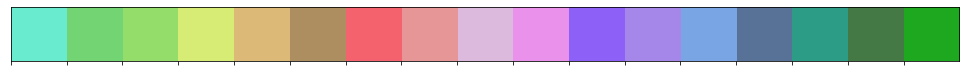

In [39]:
#Peope colors
gyr = ['#69EBD0', '#72D473', '#94DD6A',  '#D6EC74', '#DCB977',  '#AC8E61','#F4626E','#E69696', 
       '#DBBADD', '#E991EB', '#8D60F7', '#A487E8', 
       '#7AA5E5',           
       '#587196', '#2C9C86', '#447845', '#1DA820']
people = ['p1792', 'p1790', 'p1775', 'p1800', 'p1810', 'p1752', 'p1813', 'p1802', 'p1782', 'p1771', 
     'p1769', 'p1787', 'p1765', 'p1780', 'p1753', 'p1757', 'p1776']
sns.palplot(sns.color_palette(gyr))
dict_color_people = {x:y for x,y in list(zip(people,gyr))}
dict_color_people

{'6': '#79D1CB',
 '14': '#74DEEF',
 '114': '#6EB5E4',
 '65': '#6F9EF1',
 '16': '#5D6FE3',
 '73': '#6C7CE6',
 '31': '#485DB5',
 '33': '#233E84'}

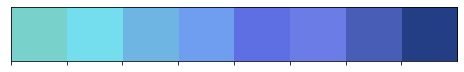

In [83]:
#Clusters colors CD4
clusters_list_cd4 = ['6', '14', '114', '65', '16', '73', '31', '33']
color_clusters = ['#79D1CB', '#74DEEF', '#6EB5E4', '#6F9EF1', '#5D6FE3', '#6C7CE6', '#485DB5', '#233E84']
sns.palplot(sns.color_palette(color_clusters))
dict_color_cluster = {x:y for x,y in list(zip(clusters_list_cd4,color_clusters))}
dict_color_cluster


# 5C - table for HLA volcano plot

In [107]:
path_to_cd4_w_clusters_data = path_fig5 + '5A/cd4with_clusters.txt'
cd4_w_clusters_data = pd.read_csv(path_to_cd4_w_clusters_data, delimiter='\t')
path_to_5c = path_fig5 + '5C/'
os.makedirs(path_to_5c, exist_ok = True)

clusters_list_cd4 = ['6', '14', '114', '65', '16', '73', '31', '33']
clusters_list_cd4_int = [int(x) for x in clusters_list_cd4]
people = ['p1792', 'p1790', 'p1775', 'p1800', 'p1810', 'p1752', 'p1813', 'p1802', 'p1782', 'p1771', 
     'p1769', 'p1787', 'p1765', 'p1780', 'p1753', 'p1757', 'p1776']

hla_table_path = path_fig5 + 'Donor_HLA_response.xlsx'
hla_table = pd.read_excel(hla_table_path)
hla_table = hla_table.loc[:, ['Sample', 'HLA_A.0', 'HLA_A.1', 'HLA_B.0', 'HLA_B.1', 'HLA_C.0',
       'HLA_C.1', 'HLA_DRB1.0', 'HLA_DRB1.1', 'HLA_DQB1.0', 'HLA_DQB1.1',
       'HLA_DRB3.0', 'HLA_DRB3.1', 'HLA_DRB4.0', 'HLA_DRB4.1', 'HLA_DRB5.0',
       'HLA_DRB5.1', 'HLA_DQA1.0', 'HLA_DQA1.1', 'HLA_DPA1.0', 'HLA_DPA1.1',
       'HLA_DPB1.0', 'HLA_DPB1.1']]

cluster_data_table = pd.DataFrame(people, columns=['Sample'])
for clust in clusters_list_cd4_int:
    good_clusters_cd4 = cd4_w_clusters_data[cd4_w_clusters_data['cluster'] == clust]
    for patient in people:
        cluster_data_table.loc[cluster_data_table['Sample']==patient, clust] = good_clusters_cd4[patient].sum()
        
cluster_data_table['Sample'] = cluster_data_table['Sample'].str.split('p').str.get(-1)      
cluster_data_table['Sample'] = cluster_data_table['Sample'].astype('int')
table_5c = hla_table.merge(cluster_data_table, on='Sample')
table_5c_path = path_to_5c + 'HLA_cluster_table.txt'
table_5c.to_csv(table_5c_path, sep='\t', index=False)


# For 5D-E-F

In [108]:
#Merge all CD4 and get CDR3aa
path_all_figs = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/'
path_fig5 = path_all_figs+'Fig5/'
os.makedirs(path_fig5, exist_ok = True)
path_cd8_all = path_fig5 + 'all_cd8.txt'

all_cd8 = pd.DataFrame()

all_cd8_pathes = glob.glob(path_all_figs+'Fig2/clones_from_venn/*/cd8.txt')

patient_list = [x.split('/')[-2] for x in all_cd8_pathes]
for cd8_path in all_cd8_pathes:
    patient = cd8_path.split('/')[-2]
    cd8 = pd.read_csv(cd8_path, delimiter='\t')

    cd8_enr_path = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/final_enrichment_cd48/p'+patient+'/cd8_6m_used/cdr3.enr.vdj.txt'
    cd8_enr = pd.read_csv(cd8_enr_path, delimiter='\t')
    cd8_enr = make_factor_to_plot_column(cd8_enr)
    
    cd8 = cd8.merge(cd8_enr, how='left', on='cdr3').drop(columns=['type'])
    cd8['patient'] = 'p'+patient
    
    all_cd8 = all_cd8.append(cd8)
    
all_cd8_col_split = all_cd8['cdr3'].str.split('|')
all_cd8['cdr3nt'] = all_cd8_col_split.str.get(0)
all_cd8['v'] = all_cd8_col_split.str.get(1)
all_cd8['j'] = all_cd8_col_split.str.get(2)

all_cd8_w_public_data = pd.DataFrame()
patient_columns = ['p'+x for x in patient_list]
all_cd8_distinct = all_cd8[all_cd8.duplicated(subset=['cdr3aa'], keep=False)==False]
all_cd8_distinct['size'] = 1
all_cd8_distinct[patient_columns]=0
for patient_num in patient_list:
    all_cd8_distinct.loc[all_cd8_distinct['patient']=='p'+patient_num, ['p'+patient_num]] = 1.0
all_cd8_w_public_data = all_cd8_w_public_data.append(all_cd8_distinct)
    
all_cd8_public = all_cd8[all_cd8.duplicated(subset=['cdr3aa'], keep=False)]
for cdr3aa_unique in list(all_cd8_public['cdr3aa'].unique()):
    cd8_this_cdraa = all_cd8_public[all_cd8_public['cdr3aa']==cdr3aa_unique]
    cd8_cdr3aa = cd8_this_cdraa.reset_index(drop=True).loc[0,:]
    for patient_num in patient_list:
        cd8_cdr3aa['p'+patient_num] = len(cd8_this_cdraa[cd8_this_cdraa['patient']=='p'+patient_num])
    cd8_cdr3aa['size'] = len(cd8_this_cdraa)
    if len(cd8_this_cdraa['patient'].unique())>1:
        cd8_cdr3aa['patient']='public'
    
    if len(cd8_this_cdraa['v'].unique()) > 1:
        if len(set([x.split('-')[0] for x in cd8_this_cdraa['v'].unique()])) == 1:
            cd8_this_cdraa['v'] = list(set([x.split('-')[0] for x in cd8_this_cdraa['v'].unique()]))[0]
            print('v', cd8_this_cdraa)
        else:
            cd8_this_cdraa['v'] = 'Multiple'
            print('v', cd8_this_cdraa)
    if len(cd8_this_cdraa['j'].unique()) > 1:
        print('j', cdr3aa_unique)
        if len(set([x.split('-')[0] for x in cd8_this_cdraa['j'].unique()])) == 1:
            cd8_this_cdraa['j'] = list(set([x.split('-')[0] for x in cd8_this_cdraa['j'].unique()]))[0]
        else:
            cd8_this_cdraa['j'] = 'Multiple'
    all_cd8_w_public_data = all_cd8_w_public_data.append(cd8_cdr3aa)
    
all_cd8_w_public_data = all_cd8_w_public_data.reset_index(drop=True)
all_cd8_w_public_data.to_csv(path_cd8_all, sep='\t', index=False)



/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = value
/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

v                                                   cdr3         cdr3aa patient  \
13   TGCGCCAGCAGCCAGGGGCAGGGGTACGAGCAGTACTTC|TRBV4-...  CASSQGQGYEQYF   p1802   
105  TGTGCCAGCAGCCAAGGACAGGGCTACGAGCAGTACTTC|TRBV5-...  CASSQGQGYEQYF   p1753   

                                      cdr3nt         v        j  
13   TGCGCCAGCAGCCAGGGGCAGGGGTACGAGCAGTACTTC  Multiple  TRBJ2-7  
105  TGTGCCAGCAGCCAAGGACAGGGCTACGAGCAGTACTTC  Multiple  TRBJ2-7  
v                                                   cdr3         cdr3aa patient  \
52   TGTGCCAGCAGCGAGGGACAGGGTTACGAGCAGTACTTC|TRBV2|...  CASSEGQGYEQYF   p1802   
22   TGTGCCAGCAGTGAAGGACAGGGTTACGAGCAGTACTTC|TRBV6-...  CASSEGQGYEQYF   p1753   
26   TGTGCCAGCAGTGAGGGACAGGGCTACGAGCAGTACTTC|TRBV6-...  CASSEGQGYEQYF   p1753   
27   TGTGCCAGCAGTGAGGGACAGGGGTACGAGCAGTACTTC|TRBV2|...  CASSEGQGYEQYF   p1753   
78   TGTGCCAGCAGTGAAGGACAGGGCTACGAGCAGTACTTC|TRBV2|...  CASSEGQGYEQYF   p1753   
111  TGTGCCAGCAGCGAAGGACAGGGCTACGAGCAGTACTTC|TRBV7-...  CASSEGQGYEQY

/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [29]:
#Add pseudocluster
path_all_figs = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/'
path_fig5 = path_all_figs+'Fig5/'
path_w_clusters_cd8 = path_fig5 + 'cd8with_clusters.txt'
cd8_w_clusters = pd.read_csv(path_w_clusters_cd8, delimiter='\t')
columns_names = list(cd8_w_clusters.columns)
pseudo_clust = pd.DataFrame(columns=columns_names)
list_pseudo = []

for x in range(len('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')):
    list_pseudo.append('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'[:x]+'A'+'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'[x:])
list_pseudo   
pseudo_clust['cdr3aa']=list_pseudo
pseudo_clust['cluster']=0
pseudo_clust['patient']=0
pseudo_clust['together']=0
pseudo_clust['size']=1
pseudo_clust['v']='x'
pseudo_clust['j']='x'
pseudo_clust['cdr3nt']='x'
list_pat = ['p1792',
 'p1790',
 'p1775',
 'p1800',
 'p1810',
 'p1752',
 'p1813',
 'p1802',
 'p1782',
 'p1771',
 'p1769',
 'p1787',
 'p1765',
 'p1780',
 'p1753',
 'p1757',
 'p1776']
for x in list_pat:
    pseudo_clust[x] = 1
pseudo_clust.to_csv(path_fig5+'pseudo_clust.txt', sep='\t', index=False)
pseudo_clust

,cdr3aa,cdr3,patient,cdr3nt,v,j,size,p1792,p1790,p1775,...,p1771,p1769,p1787,p1765,p1780,p1753,p1757,p1776,together,cluster
0,AXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX,NaN,0,x,x,x,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
1,XAXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX,NaN,0,x,x,x,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
2,XXAXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX,NaN,0,x,x,x,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
3,XXXAXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX,NaN,0,x,x,x,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
4,XXXXAXXXXXXXXXXXXXXXXXXXXXXXXXXXXX,NaN,0,x,x,x,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
5,XXXXXAXXXXXXXXXXXXXXXXXXXXXXXXXXXX,NaN,0,x,x,x,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
6,XXXXXXAXXXXXXXXXXXXXXXXXXXXXXXXXXX,NaN,0,x,x,x,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
7,XXXXXXXAXXXXXXXXXXXXXXXXXXXXXXXXXX,NaN,0,x,x,x,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
8,XXXXXXXXAXXXXXXXXXXXXXXXXXXXXXXXXX,NaN,0,x,x,x,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
9,XXXXXXXXXAXXXXXXXXXXXXXXXXXXXXXXXX,NaN,0,x,x,x,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0


{'4': '#CC0100',
 '5': '#F73636',
 '1': '#DC4B5C',
 '3': '#EA6F90',
 '6': '#D964A5',
 '7': '#C55B96'}

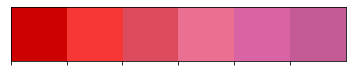

In [109]:
#Clusters colors CD8
clusters_list_cd8 = ['4', '5', '1', '3', '6', '7']
color_clusters_cd8 = ['#CC0100', '#F73636', '#DC4B5C', '#EA6F90', '#D964A5', '#C55B96']
sns.palplot(sns.color_palette(color_clusters_cd8))
dict_color_cluster = {x:y for x,y in list(zip(clusters_list_cd8,color_clusters_cd8))}
dict_color_cluster


# 5F table for HLA volcano plot

In [5]:

path_all_figs = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/'
path_fig5 = path_all_figs+'Fig5/'
path_to_cd8_w_clusters_data = path_fig5 + '5D/cd8with_clusters.txt'
cd8_w_clusters_data = pd.read_csv(path_to_cd8_w_clusters_data, delimiter='\t')
path_to_5f = path_fig5 + '5F/'
os.makedirs(path_to_5f, exist_ok = True)

clusters_list_cd8 = ['4', '5', '1', '3', '6', '7']
clusters_list_cd8_int = [int(x) for x in clusters_list_cd8]
people = ['p1792', 'p1790', 'p1775', 'p1800', 'p1810', 'p1752', 'p1813', 'p1802', 'p1782', 'p1771', 
     'p1769', 'p1787', 'p1765', 'p1780', 'p1753', 'p1757', 'p1776']

hla_table_path = path_fig5 + 'Donor_HLA_response.xlsx'
hla_table = pd.read_excel(hla_table_path)
hla_table = hla_table.loc[:, ['Sample', 'HLA_A.0', 'HLA_A.1', 'HLA_B.0', 'HLA_B.1', 'HLA_C.0',
       'HLA_C.1', 'HLA_DRB1.0', 'HLA_DRB1.1', 'HLA_DQB1.0', 'HLA_DQB1.1',
       'HLA_DRB3.0', 'HLA_DRB3.1', 'HLA_DRB4.0', 'HLA_DRB4.1', 'HLA_DRB5.0',
       'HLA_DRB5.1', 'HLA_DQA1.0', 'HLA_DQA1.1', 'HLA_DPA1.0', 'HLA_DPA1.1',
       'HLA_DPB1.0', 'HLA_DPB1.1']]

cluster_data_table = pd.DataFrame(people, columns=['Sample'])
for clust in clusters_list_cd8_int:
    good_clusters_cd8 = cd8_w_clusters_data[cd8_w_clusters_data['cluster'] == clust]
    for patient in people:
        cluster_data_table.loc[cluster_data_table['Sample']==patient, clust] = good_clusters_cd8[patient].sum()
        
cluster_data_table['Sample'] = cluster_data_table['Sample'].str.split('p').str.get(-1)      
cluster_data_table['Sample'] = cluster_data_table['Sample'].astype('int')
table_5f = hla_table.merge(cluster_data_table, on='Sample')
table_5f_path = path_to_5f + 'HLA_cluster_table.txt'
table_5f.to_csv(table_5f_path, sep='\t', index=False)

# For 5G-H epitope-specific clones

In [37]:
#Merge all epi-specific and get CDR3aa
path_all_figs = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/'
path_fig5 = path_all_figs+'Fig5/'
os.makedirs(path_fig5, exist_ok = True)
path_epi_all = path_fig5 + 'all_epitopes.txt'

all_epi_path = path_all_figs+'Fig4/good_all_epi_clones.txt'
all_epi = pd.read_csv(all_epi_path, delimiter='\t')
all_epi = all_epi.rename(columns={'factor':'cdr3', 'type':'epi'})

all_epi_col_split = all_epi['cdr3'].str.split('|')
all_epi['cdr3nt'] = all_epi_col_split.str.get(0)
all_epi['v'] = all_epi_col_split.str.get(1)
all_epi['j'] = all_epi_col_split.str.get(2)
all_epi.loc[:, ['patient']] = ['p' + str(x) for x in all_epi['patient']]

all_epi_w_public_data = pd.DataFrame()
patient_list = list(all_epi['patient'].unique())
patient_columns = patient_list

all_epi_distinct = all_epi[all_epi.duplicated(subset=['cdr3aa'], keep=False)==False]
all_epi_distinct['size'] = 1
all_epi_distinct[patient_columns]=0
for patient_num in patient_list:
    all_epi_distinct.loc[all_epi_distinct['patient']==patient_num, [patient_num]] = 1.0
all_epi_w_public_data = all_epi_w_public_data.append(all_epi_distinct)
    
all_epi_public = all_epi[all_epi.duplicated(subset=['cdr3aa'], keep=False)]
for cdr3aa_unique in list(all_epi_public['cdr3aa'].unique()):
    epi_this_cdraa = all_epi_public[all_epi_public['cdr3aa']==cdr3aa_unique]
    epi_cdr3aa = epi_this_cdraa.reset_index(drop=True).loc[0,:]
    for patient_num in patient_list:
        epi_cdr3aa[patient_num] = len(epi_this_cdraa[epi_this_cdraa['patient']==patient_num])
    epi_cdr3aa['size'] = len(epi_this_cdraa)
    if len(epi_this_cdraa['patient'].unique())>1:
        epi_cdr3aa['patient']='public'
    
    if len(epi_this_cdraa['v'].unique()) > 1:
        if len(set([x.split('-')[0] for x in epi_this_cdraa['v'].unique()])) == 1:
            epi_this_cdraa['v'] = list(set([x.split('-')[0] for x in epi_this_cdraa['v'].unique()]))[0]
            #print('v', epi_this_cdraa)
        else:
            epi_this_cdraa['v'] = 'Multiple'
            #print('v', epi_this_cdraa)
    if len(epi_this_cdraa['j'].unique()) > 1:
        print('j', cdr3aa_unique)
        if len(set([x.split('-')[0] for x in epi_this_cdraa['j'].unique()])) == 1:
            epi_this_cdraa['j'] = list(set([x.split('-')[0] for x in epi_this_cdraa['j'].unique()]))[0]
        else:
            epi_this_cdraa['j'] = 'Multiple'
    if len(epi_this_cdraa['epi'].unique()) > 1:
        print('_'.join(list(epi_this_cdraa['epi'].unique())),epi_this_cdraa)
        epi_this_cdraa['epi'] = '_'.join(list(epi_this_cdraa['epi'].unique()))
    all_epi_w_public_data = all_epi_w_public_data.append(epi_cdr3aa)
all_epi_w_public_data = all_epi_w_public_data.reset_index(drop=True)
all_epi_w_public_data.to_csv(path_epi_all, sep='\t', index=False)
all_epi_w_public_data

/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = value
/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,count,freq,public,epi,patient,cdr3,cdr3aa,cdr3nt,v,j,...,p1810,p1813,p1753,p1776,p1800,p1780,p1802,p1771,p1787,p1792
0,6480.0,0.015143,1.0,RLQ,p1752,TGTGCCTGGAGTGTAGGTACCTCTGGGAACTATGGCTACACCTTC|...,CAWSVGTSGNYGYTF,TGTGCCTGGAGTGTAGGTACCTCTGGGAACTATGGCTACACCTTC,TRBV30,TRBJ1-2,...,0,0,0,0,0,0,0,0,0,0
1,3084.0,0.007207,1.0,RLQ,p1752,TGCGCCAGCAGCCAAGAGGCAGGTGAAATCAATCAGCCCCAGCATT...,CASSQEAGEINQPQHF,TGCGCCAGCAGCCAAGAGGCAGGTGAAATCAATCAGCCCCAGCATTTT,TRBV4-3,TRBJ1-5,...,0,0,0,0,0,0,0,0,0,0
2,1554.0,0.003632,1.0,RLQ,p1752,TGCGCCAGCAGCCAAGAATGGGAAAATAACTATGGCTACACCTTC|...,CASSQEWENNYGYTF,TGCGCCAGCAGCCAAGAATGGGAAAATAACTATGGCTACACCTTC,TRBV4-1,TRBJ1-2,...,0,0,0,0,0,0,0,0,0,0
3,47.0,0.000110,1.0,RLQ,p1752,TGTGCCAGCAGTTTAGGGACAGGCCACAATGAGCAGTTCTTC|TRB...,CASSLGTGHNEQFF,TGTGCCAGCAGTTTAGGGACAGGCCACAATGAGCAGTTCTTC,TRBV27,TRBJ2-1,...,0,0,0,0,0,0,0,0,0,0
4,104.0,0.000243,1.0,RLQ,p1752,TGCGCCAGCAGCCAAGAATGGGAGACCAATCAGCCCCAGCATTTT|...,CASSQEWETNQPQHF,TGCGCCAGCAGCCAAGAATGGGAGACCAATCAGCCCCAGCATTTT,TRBV4-1,TRBJ1-5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,2423.0,0.001881,1.0,IED,p1753,TGTGCCTGGAGTGCCGACAGGTACGAGCAGTACTTC|TRBV30|TR...,CAWSADRYEQYF,TGTGCCTGGAGTGCCGACAGGTACGAGCAGTACTTC,TRBV30,TRBJ2-7,...,0,0,3,0,0,0,0,0,0,0
466,20079.0,0.016948,1.0,KCY,p1810,TGTGCCAGTAGTATAAAACAGGGCACTGAAGCTTTCTTT|TRBV19...,CASSIKQGTEAFF,TGTGCCAGTAGTATAAAACAGGGCACTGAAGCTTTCTTT,TRBV19,TRBJ1-1,...,5,0,0,0,0,0,0,0,0,0
467,6993.0,0.005903,1.0,KCY,public,TGCGCCAGCAGCCAAGATCCGGGGCCGGCTAATGAAAAACTGTTTT...,CASSQDPGPANEKLFF,TGCGCCAGCAGCCAAGATCCGGGGCCGGCTAATGAAAAACTGTTTTTT,TRBV4-3,TRBJ1-4,...,1,1,0,0,0,0,0,0,0,0
468,1761.0,0.001486,1.0,KCY,p1810,TGTGCCAGCAGTTTGAGGGGCAATCAGCCCCAGCATTTT|TRBV28...,CASSLRGNQPQHF,TGTGCCAGCAGTTTGAGGGGCAATCAGCCCCAGCATTTT,TRBV28,TRBJ1-5,...,2,0,0,0,0,0,0,0,0,0


In [42]:
#Patients colors
list_colors_epi_patients = []
for x in patient_list:
    list_colors_epi_patients.append(dict_color_people[x])

list_colors_epi_patients


['#AC8E61',
 '#94DD6A',
 '#DBBADD',
 '#DCB977',
 '#F4626E',
 '#2C9C86',
 '#1DA820',
 '#D6EC74',
 '#587196',
 '#E69696',
 '#E991EB',
 '#A487E8',
 '#69EBD0']

# 5H - stacked bar plot - number clustered clones

In [7]:
#Make table - merge public clones within the patient
path_all_figs = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/'
path_fig5 = path_all_figs+'Fig5/'
os.makedirs(path_fig5, exist_ok = True)
path_epi_all = path_fig5 + 'all_epitopes(no_public_within_patient).txt'

all_epi_path = path_all_figs+'Fig4/good_all_epi_clones.txt'
all_epi = pd.read_csv(all_epi_path, delimiter='\t')
all_epi = all_epi.rename(columns={'factor':'cdr3', 'type':'epi'})
print(len(all_epi))
all_epi = all_epi.drop_duplicates(subset=['cdr3aa', 'patient'],keep='first')
all_epi_split_col = all_epi['cdr3aa'].str.split('|')
all_epi['cdr3nt'] = all_epi_split_col.str.get(0)
all_epi['v'] = all_epi_split_col.str.get(1)
all_epi['j'] = all_epi_split_col.str.get(2)
print(len(all_epi))
all_epi.to_csv(path_epi_all, sep='\t', index=False)


484
474


### NB number of clones differ from number in Fig4 (public clones within patient are merged)

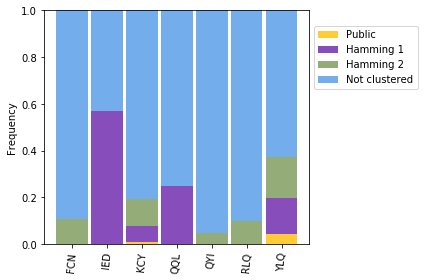

In [14]:
distances = [0,1,2]
path_all_figs = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/'
path_fig5 = path_all_figs+'Fig5/'
path_to_5H = path_fig5 + '5H/'
all_data = pd.read_csv(path_to_5H+'summary_num_clustes_avr_size.txt', delimiter='\t')
all_data_not_intra_person_cd8 = all_data.sort_values(['Epitope'])
epi_to_plot = list(all_data_not_intra_person_cd8['Epitope'].unique())
dict_to_plot = {}
for value in distances:
    dict_to_plot[value] = list(all_data_not_intra_person_cd8[all_data_not_intra_person_cd8['Distance']==value]['Fract_clustered'])
dict_to_plot['None'] = [1.0-x for x in dict_to_plot[2]]  
dict_to_plot[2] = [x-y for x,y in zip(dict_to_plot[2],dict_to_plot[1])]  
dict_to_plot[1] = [x-y for x,y in zip(dict_to_plot[1],dict_to_plot[0])]  

distances_to_plot = distances + ['None']
width = 0.91       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(epi_to_plot, np.array(dict_to_plot[0]), width,
       label='Public', color=(1.0, 0.8, 0.22))
ax.bar(epi_to_plot, np.array(dict_to_plot[1]), width,
       bottom=np.array(dict_to_plot[0]),
       label='Hamming 1', color=(0.53, 0.30, 0.73))
ax.bar(epi_to_plot, np.array(dict_to_plot[2]), width,
       bottom=np.array(dict_to_plot[0])+np.array(dict_to_plot[1]),
       label='Hamming 2', color=(0.58, 0.68, 0.47))
ax.bar(epi_to_plot, np.array(dict_to_plot['None']), width,
       bottom=np.array(dict_to_plot[0])+np.array(dict_to_plot[1])+np.array(dict_to_plot[2]),
       label='Not clustered', color=(0.45, 0.68, 0.92))
ax.set_ylim([0, 1])
ax.set_ylabel('Frequency')
plt.xticks(rotation=85)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.tight_layout()
path_to_png = path_to_5H+'stacked_frac_clustered.png'
plt.savefig(path_to_png, dpi=250)
plt.show()

# Fig5I
# Make one database (VDJdb + Adaptive)

In [5]:
# Chank adaptive chunks (rename meta.subject.id)
chunks_pathes = glob.glob('/Users/labuser/Desktop/Codes for Petrovax/vdjmatch_vdjdb_adaptive/vdjdb-db-master-all/chunks/*.txt')
for chunk_path in chunks_pathes:
    chuck = pd.read_csv(chunk_path, delimiter='\t')
    chuck['meta.subject.id']='MIRA'
    chuck.to_csv(chunk_path, sep='\t', index=False)


In [22]:
#Prepare tables for VDJmatch
cds = ['cd4', 'cd8', 'undef']

path_all_figs = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/'
path_fig5 = path_all_figs+'Fig5/'
    for cd_name in cds:
    path_cd_all = path_fig5 + 'all_'+cd_name+'_w_public.txt'

    all_cd = pd.DataFrame()
    all_cd_pathes = glob.glob(path_all_figs+'Fig2/clones_from_venn/*/'+cd_name+'.txt')

    for cd_path in all_cd_pathes:
        patient = cd_path.split('/')[-2]
        cd = pd.read_csv(cd_path, delimiter='\t')
        if cd_name=='cd4':
            cd_enr_path = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/final_enrichment_cd48/p'+patient+'/cd4_6m_used/cdr3.enr.vdj.txt'
        elif cd_name=='cd8': 
            cd_enr_path = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/final_enrichment_cd48/p'+patient+'/cd8_6m_used/cdr3.enr.vdj.txt'
        else:
            cd_enr_path = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/final_enrichment_wells/p'+patient+'/well_1_6m_used/cdr3.enr.vdj.txt'
        cd_enr = pd.read_csv(cd_enr_path, delimiter='\t')
        cd_enr = make_factor_to_plot_column(cd_enr)
        a = (len(cd))
        cd = cd.merge(cd_enr, how='left', on='cdr3').drop(columns=['type'])
        cd['count'] = patient
        b = (len(cd))
        all_cd = all_cd.append(cd)
        if a!=b:
            print('ALARM')

    all_cd_col_split = all_cd['cdr3'].str.split('|')
    all_cd['cdr3nt'] = all_cd_col_split.str.get(0)
    all_cd['v'] = all_cd_col_split.str.get(1)
    all_cd['j'] = all_cd_col_split.str.get(2)
    all_cd['d']=''
    all_cd['freq']=0.1
    all_cd = all_cd.loc[:, ['count', 'freq', 'cdr3nt', 'cdr3aa', 'v', 'd', 'j']]
    all_cd.to_csv(path_cd_all, sep='\t', index=False)
    

In [31]:
#Write metadata
path_all_figs = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/'
path_fig5 = path_all_figs+'Fig5/'
#path_cd_all = path_fig5 + 'all_'+cd_name+'_w_public.txt'

metadata = pd.DataFrame()
path_start_files = path_fig5 + 'all_*_w_public.txt'

metadata['file_name'] = glob.glob(path_start_files)#[x.replace(' ', '\ ') for x in glob.glob(path_start_files)]
metadata['sample_id'] = metadata['file_name'].str.split('/').str.get(-1).str.split('.').str.get(0).str.split('_').str.get(1)

path_to_meta = '/Users/labuser/Desktop/Codes for Petrovax/vdjmatch_vdjdb_adaptive/metadata_cd.txt'
metadata.to_csv(path_to_meta, sep='\t', index=False)

In [10]:
#Make VDJmatch code
path_all_figs = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/'
path_fig5 = path_all_figs+'Fig5/'
path_to_5i = path_fig5+'5I/'
os.makedirs(path_to_5i, exist_ok = True)


var = ['1,0,1']
prefixes = [' v']

new_file = "/Users/labuser/Desktop/Codes for Petrovax/vdjmatch_vdjdb_adaptive/vdjmatch_cd.sh"
fi = open(new_file,"w+")

path_to_result = path_to_5i + 'results/'
mkdir = 'mkdir ' + path_to_result.replace(' ', '\ ') + "\n"
fi.write(mkdir)

a = 'cd ' + path_to_result.replace(' ', '\ ') + "\n"
fi.write(a)

path_to_meta = '/Users/labuser/Desktop/Codes\ for\ Petrovax/vdjmatch_vdjdb_adaptive/metadata_cd.txt'
metadata = '-m '+ path_to_meta

for pre in prefixes:
    gene = 'TRB'
    if pre == ' vj':
        match = '--v-match --j-match'
    elif pre == ' v':
        match = '--v-match'
    else:
        match = ''
    path_to_df = '/Users/labuser/Desktop/Codes\ for\ Petrovax/vdjmatch_vdjdb_adaptive/vdjdb-db-master-all/database/vdjdb'

    for variation in var:
        name = '-' + variation
        prefix = pre + variation
        indel = ' -O '
        summary = '--summary-columns antigen.gene,antigen.epitope,mhc.class,meta '
        command = 'java -jar /Users/labuser/Desktop/vdjmatch-1.3.1/vdjmatch-1.3.1.jar match -R ' + gene + ' -S human --filter="__antigen.species__=~\'SARS-CoV-2\'" ' + summary + match + indel + str(variation) + ' --database ' + path_to_df +  ' --min-epi-size 1 ' + metadata + prefix + "\n"
        fi.write(command)
    print(pre)
        #s = 'cd ../ \n'
        #fi.write(s)

fi.close() 

 v


In [37]:
#After VDJmatch - edit result table
path_all_figs = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/'
path_fig5 = path_all_figs+'Fig5/'
path_to_5i = path_fig5+'5I/'
result_table_path = path_to_5i + 'results/v1,0,1.cd8.txt'
path_to_result = path_to_5i+'cd8_w_db.txt'
path_to_result_ylq_nyn = path_to_5i+'cd8_w_db_only_YLQ_NYN_v_sizes.txt'

result_table = pd.read_csv(result_table_path, delimiter='\t')
result_table['meta.subject.cohort']=result_table['meta'].str.split('subject.cohort": "').str.get(-1).str.split('", "').str.get(0)

#get MIRA Jgenes
mira_pathi = '/Users/labuser/Desktop/Codes for Petrovax/vdjmatch_vdjdb_adaptive/vdjdb-db-master-all/chunks/chunki.txt'
mira_i = pd.read_csv(mira_pathi, delimiter='\t')
mira_i = mira_i.loc[:, ['j.beta', 'meta.subject.cohort']]
mira_pathii = '/Users/labuser/Desktop/Codes for Petrovax/vdjmatch_vdjdb_adaptive/vdjdb-db-master-all/chunks/chunkii.txt'
mira_ii = pd.read_csv(mira_pathii, delimiter='\t')
mira_ii = mira_ii.loc[:, ['j.beta', 'meta.subject.cohort']]
mira = mira_ii.append(mira_i)
mira['j.beta'] = ['TRBJ'+x[5]+'-'+x[-1] for x in mira['j.beta']]
mira['j.beta'] = mira['j.beta'].replace('TRBJ2-X', 'TRBJ2')

result_table = result_table.merge(mira, how='left', on='meta.subject.cohort')
result_table.loc[result_table['j.segm']!=result_table['j.segm'],['j.segm']]=result_table['j.beta']

epitopes = result_table['meta'].str.split('"study.id": "').str.get(-1).str.split('", "').str.get(0)
database = result_table['meta'].str.split('subject.id": "').str.get(-1).str.split('", "').str.get(0)
database = ['VDJdb' if x != 'MIRA' else x for x in database]
result_table['patient'] = database
result_table['epitope'] = epitopes
result_table.loc[result_table['epitope']=='',['epitope']]=result_table['antigen.epitope']
result_table['epi']=[x[:3] for x in result_table['epitope']]
result_table.loc[:,['epi']] = result_table['epi'].replace('NYL', 'NYN').replace('LSP', 'SPR')
epi_dict = {}
for epi in list(result_table['epi'].unique()):
    epi_dict[epi]=list(result_table[result_table['epi']==epi]['epitope'].unique())
result_table['v'] = result_table['v.segm'].str.split('*').str.get(0)
result_table['j'] = result_table['j.segm'].str.split('*').str.get(0)
result_table['cdr3aa'] = result_table['cdr3']
result_table = result_table.loc[:, ['cdr3nt', 'cdr3aa', 'v', 'j', 'patient', 'epi']]#,'antigen.gene']]
result_table.drop_duplicates(inplace=True)#.reset_index(drop=True)
result_table.reset_index(drop=True,inplace=True)
result_table['database'] = 1

#Load all patients clones
path_to_cd8 = path_fig5 + 'all_cd8_w_public.txt'
cd8 = pd.read_csv(path_to_cd8, delimiter='\t')
cd8.rename(columns={'count':'patient'}, inplace=True)
cd8['epi']='CD8'
cd8['patient']=['p'+str(x) for x in cd8['patient']]
cd8['database']=0
cd8 = cd8.loc[:, ['cdr3nt', 'cdr3aa', 'v', 'j', 'patient', 'epi', 'database']]
print(len(cd8))
#Add cluster data
path_to_cd8_clust = path_fig5 + '5D/cd8with_clusters.txt'
cd8_clust = pd.read_csv(path_to_cd8_clust, delimiter='\t')
cd8_clust = cd8_clust.loc[:, ['cdr3aa', 'cluster']].drop_duplicates()
cd8 = cd8.merge(cd8_clust, how='left', on='cdr3aa')
cd8 = cd8.rename(columns={'cluster':'old_cluster'})
print(len(cd8))

cd8_w_db = cd8.append(result_table)
cd8_w_db['epi_label']=cd8_w_db['epi']

all_epi_w_public_data = pd.DataFrame()
patient_list = list(cd8_w_db['patient'].unique())
patient_columns = patient_list

all_epi_distinct = cd8_w_db[cd8_w_db.duplicated(subset=['cdr3aa'], keep=False)==False]
all_epi_distinct['size'] = 1
all_epi_distinct['sizes_v'] = 1
all_epi_distinct[patient_columns]=0
for patient_num in patient_list:
    all_epi_distinct.loc[all_epi_distinct['patient']==patient_num, [patient_num]] = 1.0
all_epi_w_public_data = all_epi_w_public_data.append(all_epi_distinct)
    
all_epi_public = cd8_w_db[cd8_w_db.duplicated(subset=['cdr3aa'], keep=False)]
for cdr3aa_unique in list(all_epi_public['cdr3aa'].unique()):
    epi_this_cdraa = all_epi_public[all_epi_public['cdr3aa']==cdr3aa_unique]
    epi_cdr3aa = epi_this_cdraa.reset_index(drop=True).loc[0,:]
    for patient_num in patient_list:
        epi_cdr3aa[patient_num] = len(epi_this_cdraa[epi_this_cdraa['patient']==patient_num])
    epi_cdr3aa['size'] = len(epi_this_cdraa)
    epi_cdr3aa['sizes_v'] = len(epi_this_cdraa)
    if len(epi_this_cdraa['patient'].unique())>1:
        epi_cdr3aa['patient']='public'
    if epi_this_cdraa['database'].sum()>0:
        epi_cdr3aa['database']=1
    if len(epi_this_cdraa['v'].unique()) > 1:
        if len(set([x.split('-')[0] for x in epi_this_cdraa['v'].unique()])) == 1:
            epi_cdr3aa['v'] = list(set([x.split('-')[0] for x in epi_this_cdraa['v'].unique()]))[0]
            #print('v', epi_this_cdraa)
        else:
            all_v_genes = list(epi_this_cdraa['v'].unique())
            v_sizes = []
            for v_gene_name in all_v_genes:
                v_sizes.append(str(len(epi_this_cdraa[epi_this_cdraa['v']==v_gene_name])))
            epi_cdr3aa['sizes_v'] = '_'.join(v_sizes)
            epi_cdr3aa['v'] = '_'.join(all_v_genes)
            #print('v', epi_this_cdraa)
    if len(epi_this_cdraa['j'].unique()) > 1:
        print('j', cdr3aa_unique)
        if len(set([x.split('-')[0] for x in epi_this_cdraa['j'].unique()])) == 1:
            epi_cdr3aa['j'] = list(set([x.split('-')[0] for x in epi_this_cdraa['j'].unique()]))[0]
        else:
            epi_cdr3aa['j'] = 'Multiple'
    if len(epi_this_cdraa['epi'].unique()) > 1:
        #print('_'.join(list(epi_this_cdraa['epi'].unique())))
        epi_cdr3aa['epi_label'] = '_'.join(list(epi_this_cdraa['epi'].unique()))
        epi_cdr3aa['epi'] = list(epi_this_cdraa['epi'].unique())[0]
    if len(epi_this_cdraa['old_cluster'].unique()) > 1:
        epi_cdr3aa['old_cluster'] = '_'.join([str(x) for x in list(epi_this_cdraa['old_cluster'].unique())])
    all_epi_w_public_data = all_epi_w_public_data.append(epi_cdr3aa)
all_epi_w_public_data = all_epi_w_public_data.reset_index(drop=True)
#all_epi_w_public_data.to_csv(path_to_result, sep='\t', index=False)
all_epi_w_public_data=all_epi_w_public_data.loc[(all_epi_w_public_data['epi']=='NYN')|(all_epi_w_public_data['epi']=='YLQ')|(all_epi_w_public_data['epi']=='CD8')].reset_index(drop=True)
all_epi_w_public_data= all_epi_w_public_data[(all_epi_w_public_data['epi_label']!='CD8_QLM_FLN')&(all_epi_w_public_data['epi_label']!='CD8_QLM')&(all_epi_w_public_data['epi_label']!='CD8_FLN')]
all_epi_w_public_data.to_csv(path_to_result_ylq_nyn, sep='\t', index=False)


419
419


/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [64]:
# For VJ usge correct
#Correct VJusage YLQ clusters
path_all_figs = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/'
path_fig5 = path_all_figs+'Fig5/'
path_to_5i = path_fig5+'5I/'
path_to_vj = path_to_5i + 'VJ_usage/'
os.makedirs(path_to_vj, exist_ok = True)


path_to_df = path_to_5i + '_cd8_w_V_sizeswith_clusters.txt'
clust_ylq = pd.read_csv(path_to_df, delimiter='\t')
clust_ylq = clust_ylq.loc[clust_ylq['cluster']==clust_ylq['cluster'], :]
#clust_ylq1 = clust_ylq.loc[clust_ylq['cluster']==1]
v_genes_to_change = [x for x in list(clust_ylq.v.unique()) if '_' in x]
v_genes_not_to_change = [x for x in list(clust_ylq.v.unique()) if '_' not in x]
df_changed = clust_ylq.loc[clust_ylq['v'].isin(v_genes_not_to_change)]

for v_gene in v_genes_to_change:
    cdr3s_w_v_gene = clust_ylq.loc[clust_ylq['v']==v_gene].reset_index(drop=True)
    #print(len(cdr3s_w_v_gene),v_sizes)
    for row in range(len(cdr3s_w_v_gene)):
        cdr3s_w_v_gene_row = cdr3s_w_v_gene.loc[row,:]
        v_gene = cdr3s_w_v_gene_row['v'].split('_')
        v_sizes = cdr3s_w_v_gene_row['sizes_v'].split('_')
        print(len(v_gene)==len(v_sizes))
        print(v_gene, v_sizes)
        for ind_v in range(len(v_gene)):
            cdr3s_new_v_and_size = cdr3s_w_v_gene_row.copy()
            cdr3s_new_v_and_size['v']=v_gene[ind_v]
            cdr3s_new_v_and_size['size']=int(v_sizes[ind_v])
            df_changed = df_changed.append(cdr3s_new_v_and_size)
    
path_to_res = path_to_vj + 'NYN_in_big_clust_correct_V_genes.txt'
df_changed.to_csv(path_to_res, sep='\t', index=False)

df_changed


True
['TRBV6-1', 'TRBV10-2', 'TRBV2'] ['13', '1', '2']
True
['TRBV2', 'TRBV7-2'] ['4', '1']
True
['TRBV6-4', 'TRBV2'] ['2', '6']
True
['TRBV2', 'TRBV6-1', 'TRBV6-4', 'TRBV7-2', 'TRBV7-3', 'TRBV10-1'] ['45', '14', '4', '1', '1', '1']
True
['TRBV2', 'TRBV6-1'] ['6', '7']
True
['TRBV2', 'TRBV25-1'] ['11', '1']
True
['TRBV6-1', 'TRBV2', 'TRBV25-1'] ['1', '4', '1']
True
['TRBV2', 'TRBV10-1'] ['1', '1']
True
['TRBV2', 'TRBV10-1'] ['3', '1']
True
['TRBV2', 'TRBV27', 'TRBV10-1', 'TRBV6-4'] ['5', '1', '1', '1']
True
['TRBV5-4', 'TRBV6-1', 'TRBV7-2', 'TRBV2'] ['1', '9', '1', '2']
True
['TRBV12-3', 'TRBV27'] ['1', '7']
True
['TRBV5-4', 'TRBV2', 'TRBV6-4'] ['4', '2', '1']
True
['TRBV4-1', 'TRBV5-4'] ['1', '1']


,cdr3aa,cdr3nt,v,j,patient,epi,database,old_cluster,epi_label,size,...,p1787,p1765,p1780,p1753,p1757,p1776,MIRA,VDJdb,together,cluster
7,CAISEGGGYEQYF,TGTGCCATCAGTGAGTCAGGAGGCTACGAGCAGTACTTC,TRBV10-3,TRBJ2-7,MIRA,NYN,1,NaN,NYN,1,...,0,0,0,0,0,0,1,0,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1,5.0
9,CAISEGQGYEQYF,TGTGCCATCAGTGAGTCGCAGGGTTACGAGCAGTACTTC,TRBV10-3,TRBJ2-7,MIRA,NYN,1,NaN,NYN,2,...,0,0,0,0,0,0,2,0,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|2,5.0
10,CAISEGTGYEQYF,TGTGCCATCAGTGAGTGGACAGGCTACGAGCAGTACTTC,TRBV10-3,TRBJ2-7,MIRA,NYN,1,NaN,NYN,1,...,0,0,0,0,0,0,1,0,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1,5.0
12,CAISEQQGYEQFF,TGTGCCATCAGTGAGCAACAGGGGTATGAGCAGTTCTTC,TRBV10-3,TRBJ2-1,p1753,CD8,0,7.0,CD8,1,...,0,0,0,1,0,0,0,0,0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0|0|0,5.0
13,CAISEQQGYEQYF,TGTGCCATCAGTGAGCAACAGGGCTACGAGCAGTACTTC,TRBV10-3,TRBJ2-7,public,CD8,1,7.0_nan,CD8_NYN,4,...,0,0,0,1,0,0,3,0,0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0|0|3,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,CASSPGQGYEQYF,TGTGCCAGCAGCCCGGGACAGGGCTACGAGCAGTACTTC,TRBV5-4,TRBJ2-7,public,CD8,1,4.0_nan,CD8_NYN,4,...,0,0,0,6,0,0,0,1,0|0|0|0|0|0|0|0|0|0|0|0|0|0|6|0|0|1|0,5.0
0,CASSPGQGYEQYF,TGTGCCAGCAGCCCGGGACAGGGCTACGAGCAGTACTTC,TRBV2,TRBJ2-7,public,CD8,1,4.0_nan,CD8_NYN,2,...,0,0,0,6,0,0,0,1,0|0|0|0|0|0|0|0|0|0|0|0|0|0|6|0|0|1|0,5.0
0,CASSPGQGYEQYF,TGTGCCAGCAGCCCGGGACAGGGCTACGAGCAGTACTTC,TRBV6-4,TRBJ2-7,public,CD8,1,4.0_nan,CD8_NYN,1,...,0,0,0,6,0,0,0,1,0|0|0|0|0|0|0|0|0|0|0|0|0|0|6|0|0|1|0,5.0
0,CASSQGQGYEQYF,TGCGCCAGCAGCCAGGGGCAGGGGTACGAGCAGTACTTC,TRBV4-1,TRBJ2-7,public,CD8,0,4.0,CD8,1,...,0,0,0,1,0,0,0,0,0|0|0|0|0|0|0|1|0|0|0|0|0|0|1|0|0|0|0,5.0


In [60]:
df_changed

,cdr3aa,cdr3nt,v,j,patient,epi,database,old_cluster,epi_label,size,...,p1787,p1765,p1780,p1753,p1757,p1776,MIRA,VDJdb,together,cluster
7,CAISEGGGYEQYF,TGTGCCATCAGTGAGTCAGGAGGCTACGAGCAGTACTTC,TRBV10-3,TRBJ2-7,MIRA,NYN,1,NaN,NYN,1,...,0,0,0,0,0,0,1,0,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1,5.0
9,CAISEGQGYEQYF,TGTGCCATCAGTGAGTCGCAGGGTTACGAGCAGTACTTC,TRBV10-3,TRBJ2-7,MIRA,NYN,1,NaN,NYN,2,...,0,0,0,0,0,0,2,0,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|2,5.0
10,CAISEGTGYEQYF,TGTGCCATCAGTGAGTGGACAGGCTACGAGCAGTACTTC,TRBV10-3,TRBJ2-7,MIRA,NYN,1,NaN,NYN,1,...,0,0,0,0,0,0,1,0,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1,5.0
12,CAISEQQGYEQFF,TGTGCCATCAGTGAGCAACAGGGGTATGAGCAGTTCTTC,TRBV10-3,TRBJ2-1,p1753,CD8,0,7.0,CD8,1,...,0,0,0,1,0,0,0,0,0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0|0|0,5.0
13,CAISEQQGYEQYF,TGTGCCATCAGTGAGCAACAGGGCTACGAGCAGTACTTC,TRBV10-3,TRBJ2-7,public,CD8,1,7.0_nan,CD8_NYN,4,...,0,0,0,1,0,0,3,0,0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0|0|3,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,CSARGQHSSYEQYF,TGCAGTGCTAGGGGGCAGCATAGCTCCTACGAGCAGTACTTC,TRBV20-1,TRBJ2-7,p1775,CD8,0,1.0,CD8,1,...,0,0,0,0,0,0,0,0,0|0|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0,2.0
399,CSARGQVSSYEQYF,TGCAGTGCTAGGGGTCAGGTTAGCTCCTACGAGCAGTACTTC,TRBV20-1,TRBJ2-7,p1752,CD8,0,1.0,CD8,1,...,0,0,0,0,0,0,0,0,0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0|0|0|0,2.0
0,CASSEAGGYEQYF,TGTGCCAGCAGTGAAGCCGGCGGGTACGAGCAGTACTTC,TRBV6-1,TRBJ2-7,public,CD8,1,5.0_nan,CD8_NYN,13,...,0,0,0,5,0,0,1,10,0|0|0|0|0|0|0|0|0|0|0|0|0|0|5|0|0|10|1,5.0
0,CASSEAGGYEQYF,TGTGCCAGCAGTGAAGCCGGCGGGTACGAGCAGTACTTC,TRBV10-2,TRBJ2-7,public,CD8,1,5.0_nan,CD8_NYN,1,...,0,0,0,5,0,0,1,10,0|0|0|0|0|0|0|0|0|0|0|0|0|0|5|0|0|10|1,5.0


# Fig 5K - NYN dynamics

In [31]:
def make_factor_nt_days(df,day):
    df = df.rename(columns={'freq':'freq_'+day, 'count': 'count_'+day})
    df['factor'] = df['cdr3nt'].map(str) + '|' + df['v'].map(str) + '|' + df['j'].map(str)
    df = df[['factor', 'freq_'+day, 'count_'+day]]#'freq', 'count']]
    return df

no_d28 = ['1802']

empty_df = pd.DataFrame(columns=['count', 'freq', 'cdr3nt', 'cdr3aa', 'v', 'd', 'j', 'VEnd', 'DStart',
       'DEnd', 'JStart'])

## From VDJmatch results

In [37]:
path_all_figs = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/'
path_fig5 = path_all_figs+'Fig5/'
path_to_5i = path_fig5+'5I/'
path_to_5k = path_fig5+'5K/'
os.makedirs(path_to_5k, exist_ok = True)

path_all_wells = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/wells/nc.vdj.p'

result_table_path = path_to_5i + 'results/v1,0,1.cd8.txt'
result_table = pd.read_csv(result_table_path, delimiter='\t')
epitopes = result_table['meta'].str.split('"study.id": "').str.get(-1).str.split('", "').str.get(0)
database = result_table['meta'].str.split('subject.id": "').str.get(-1).str.split('", "').str.get(0)
database = ['VDJdb' if x != 'MIRA' else x for x in database]
result_table['patient'] = database
result_table['epitope'] = epitopes
result_table.loc[result_table['epitope']=='',['epitope']]=result_table['antigen.epitope']
result_table['epi']=[x[:3] for x in result_table['epitope']]
result_table.loc[:,['epi']] = result_table['epi'].replace('NYL', 'NYN').replace('LSP', 'SPR')


nyn_res = result_table[result_table['epi']=='NYN'].loc[:, ['cdr3nt', 'cdr3aa', 'v', 'j', 'count']].rename(columns={'count':'patient'}).reset_index(drop=True)
print(len(nyn_res))
nyn_res = nyn_res.drop_duplicates()
print(len(nyn_res))

summary_timeline_all = pd.DataFrame()

for patient in list(nyn_res['patient'].unique()):
    patient_nyn = nyn_res.loc[nyn_res['patient']==patient, :]
    patient_nyn['factor'] = patient_nyn['cdr3nt'].map(str) + '|' + patient_nyn['v'].map(str) + '|' + patient_nyn['j'].map(str)
    print(len(patient_nyn))
    d0_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'+str(patient)+'_total_PBMC_day_0_clonotypes.txt'
    d0 = pd.read_csv(d0_path, delimiter='\t')
    d0 = make_factor_nt_days(d0, 'd0')
    
    d14_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'+str(patient)+'_total_PBMC_day_14_clonotypes.txt'
    d14 = pd.read_csv(d14_path, delimiter='\t')
    d14 = make_factor_nt_days(d14, 'd14')
    
    if str(patient) in no_d28:
        d28 = empty_df
    else:
        d28_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'+str(patient)+'_total_PBMC_day_28_clonotypes.txt'
        d28 = pd.read_csv(d28_path, delimiter='\t')
    d28 = make_factor_nt_days(d28, 'd28')
    
    m6_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'+str(patient)+'_total_PBMC_6M_clonotypes.txt'
    m6 = pd.read_csv(m6_path, delimiter='\t')
    m6 = make_factor_nt_days(m6, 'm6')
        
    s6m_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/6M_spike/nc.vdj.p'+str(patient)+'_Spike_exp_6M_clonotypes.txt'
    s6m = pd.read_csv(s6m_path, delimiter='\t')
    s6m = make_factor_nt_days(s6m, 's6m')

    path_exp_d14_w1 = path_all_wells + str(patient) + '_Spike_exp_puls_well_1_clonotypes.txt'
    d14_w1 = pd.read_csv(path_exp_d14_w1, delimiter='\t')
    d14_w1 = make_factor_nt_days(d14_w1, 'w1')
    path_exp_d14_w2 = path_all_wells + str(patient) + '_Spike_exp_puls_well_2_clonotypes.txt'
    try:
        d14_w2 = pd.read_csv(path_exp_d14_w2, delimiter='\t')
        d14_w2 = make_factor_nt_days(d14_w2, 'w2')
        d14_exp = d14_w1.merge(d14_w2, how='outer', on='cdr3').fillna(0)
        d14_exp['freq_well'] = (d14_exp['freq_w1'] + d14_exp['freq_w2'])/2.0
        d14_exp = d14_exp.loc[:, ['cdr3', 'freq_well']]
        print(d14_exp['freq_well'].sum())
    except:
        d14_exp = d14_w1.copy()
        d14_exp = d14_exp.rename(columns={'freq_w1': 'freq_well'})
    d14_exp['type_well'] = 'well'
    #Epitope
    dynamics = patient_nyn.merge(d0, how='left', on='factor').merge(d14, how='left', 
                                              on='factor').merge(d28, how='left', on='factor').merge(m6, how='left',
                                              on='factor').merge(s6m, how='left', on='factor').merge(d14_exp, how='left',
                                              on='factor').reset_index(drop=True).fillna(0)
    dynamics_full_path = path_to_5k + str(patient) + '_full_NYN_dynamics.txt'
    dynamics.to_csv(dynamics_full_path, sep='\t', index=False)
    
    dict_dynamics = {
        'patient': str(patient), 'num_NYN_specific': len(dynamics),
        'num_d0_epi_specific': len(dynamics[dynamics['freq_d0']!=0]), 
        'num_d14_epi_specific': len(dynamics[dynamics['freq_d14']!=0]),
        'num_d28_epi_specific': len(dynamics[dynamics['freq_d28']!=0]), 
        'num_6m_epi_specific': len(dynamics[dynamics['freq_m6']!=0]), 
        'num_s6m_epi_specific': len(dynamics[dynamics['freq_s6m']!=0]),
        'num_s14d_epi_specific': len(dynamics[dynamics['freq_well']!=0]),
        
        'freq_d0_epi_specific': dynamics[dynamics['freq_d0']!=0]['freq_d0'].sum(), 
        'freq_d14_epi_specific': dynamics[dynamics['freq_d14']!=0]['freq_d14'].sum(),
        'freq_d28_epi_specific': dynamics[dynamics['freq_d28']!=0]['freq_d28'].sum(), 
        'freq_6m_epi_specific': dynamics[dynamics['freq_m6']!=0]['freq_m6'].sum(), 
        'freq_s6m_epi_specific': dynamics[dynamics['freq_s6m']!=0]['freq_s6m'].sum(),
        'freq_s14d_epi_specific': dynamics[dynamics['freq_well']!=0]['freq_well'].sum()
        
    }
    
    summary_timeline_all = summary_timeline_all.append(dict_dynamics, ignore_index = True)
    
summary_timeline_all = summary_timeline_all.loc[:, ['patient', 'num_NYN_specific', 
        'num_d0_epi_specific', 'num_d14_epi_specific',
        'num_d28_epi_specific', 'num_6m_epi_specific',
        'num_s6m_epi_specific', 'num_s14d_epi_specific',
        
       'freq_d0_epi_specific', 'freq_d14_epi_specific',
        'freq_d28_epi_specific', 'freq_6m_epi_specific', 
        'freq_s6m_epi_specific', 'freq_s14d_epi_specific']]
    
summary_timeline_path = path_to_5k+'summary_dynamics_NYN.txt'
summary_timeline_all.to_csv(summary_timeline_path, sep='\t', index=False)


438
51
8


/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


43


,cdr3nt,cdr3aa,v,j,patient,factor,freq_d0,count_d0,freq_d14,count_d14,freq_d28,count_d28,freq_m6,count_m6,freq_s6m,count_s6m,freq_well,count_w1,type_well
0,TGTGCCAGCAGTTTGGGTCAAGGCTACGAGCAGTACTTC,CASSLGQGYEQYF,TRBV27,TRBJ2-7,1753,TGTGCCAGCAGTTTGGGTCAAGGCTACGAGCAGTACTTC|TRBV27...,0.0,0.0,0.000106,16.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000588,109.0,well
1,TGTGCCAGCAGTGAGGGGCAAGGGTATGAGCAGTTCTTC,CASSEGQGYEQFF,TRBV6-4,TRBJ2-1,1753,TGTGCCAGCAGTGAGGGGCAAGGGTATGAGCAGTTCTTC|TRBV6-...,0.0,0.0,0.000258,39.0,0.000010,1.0,0.0,0.0,0.000000,0.0,0.000809,150.0,well
2,TGTGCCAGCAGCCCGGGACAAGGCTACGAGCAGTACTTC,CASSPGQGYEQYF,TRBV2,TRBJ2-7,1753,TGTGCCAGCAGCCCGGGACAAGGCTACGAGCAGTACTTC|TRBV2|...,0.0,0.0,0.000026,4.0,0.000020,2.0,0.0,0.0,0.000004,1.0,0.001525,283.0,well
3,TGTGCCAGCAGTGAAGCCGGCGGGTACGAGCAGTACTTC,CASSEAGGYEQYF,TRBV6-1,TRBJ2-7,1753,TGTGCCAGCAGTGAAGCCGGCGGGTACGAGCAGTACTTC|TRBV6-...,0.0,0.0,0.000013,2.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000782,145.0,well
4,TGTGCCAGCAGTGAGACAGGGGGCTACGAGCAGTACTTC,CASSETGGYEQYF,TRBV6-1,TRBJ2-7,1753,TGTGCCAGCAGTGAGACAGGGGGCTACGAGCAGTACTTC|TRBV6-...,0.0,0.0,0.000106,16.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000852,158.0,well
5,TGTGCCAGCAGTGAACAGGAGGGGTACGAGCAGTACTTC,CASSEQEGYEQYF,TRBV2,TRBJ2-7,1753,TGTGCCAGCAGTGAACAGGAGGGGTACGAGCAGTACTTC|TRBV2|...,0.0,0.0,0.000073,11.0,0.000000,0.0,0.0,0.0,0.000012,3.0,0.008528,1582.0,well
6,TGTGCCAGCAGTTACGGACAGGGATACGAGCAGTACTTC,CASSYGQGYEQYF,TRBV6-1,TRBJ2-7,1753,TGTGCCAGCAGTTACGGACAGGGATACGAGCAGTACTTC|TRBV6-...,0.0,0.0,0.000013,2.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.001288,239.0,well
7,TGTGCCAGCAGTGAAACAGGGGGTTACGAGCAGTACTTC,CASSETGGYEQYF,TRBV6-1,TRBJ2-7,1753,TGTGCCAGCAGTGAAACAGGGGGTTACGAGCAGTACTTC|TRBV6-...,0.0,0.0,0.000013,2.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000049,9.0,well
8,TGTGCCAGCAGCTTAACGGGGGGCTACGAGCAGTACTTC,CASSLTGGYEQYF,TRBV12-3,TRBJ2-7,1753,TGTGCCAGCAGCTTAACGGGGGGCTACGAGCAGTACTTC|TRBV12...,0.0,0.0,0.000053,8.0,0.000020,2.0,0.0,0.0,0.000000,0.0,0.005266,977.0,well
9,TGTGCCAGCAGTGAACAGGGGGGCTACGAGCAGTACTTC,CASSEQGGYEQYF,TRBV2,TRBJ2-7,1753,TGTGCCAGCAGTGAACAGGGGGGCTACGAGCAGTACTTC|TRBV2|...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000668,124.0,well


## From clusters data

In [70]:
from_home = False
if from_home==True:
    path_all_figs = '/Users/macbook/Downloads/check codes and results/'
else:
    path_all_figs = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/'
path_fig5 = path_all_figs+'Fig5/'
path_to_5i = path_fig5+'5I/'
path_to_5k = path_fig5+'5K/'
os.makedirs(path_to_5k, exist_ok = True)

path_all_wells = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/wells/nc.vdj.'

result_table_path = path_to_5i + 'cd8_w_dbswith_clusters.txt'
result_table = pd.read_csv(result_table_path, delimiter='\t')
nyn_res_all = result_table.loc[((result_table['cluster']==7)|(result_table['cluster']==5))&((result_table['epi']=='CD8')|(result_table['patient']=='public')), :]

nyn_res = nyn_res_all.loc[nyn_res_all['patient']!='public', ['patient', 'cdr3nt', 'cdr3aa', 'v', 'j']]

public_clones = nyn_res_all.loc[(nyn_res_all['patient']=='public')&((nyn_res_all['p1780']!=0)|(nyn_res_all['p1802']!=0)|(nyn_res_all['p1753']!=0)),:]

all_cd8_path = path_fig5+'all_cd8_w_public.txt'
all_cd8 = pd.read_csv(all_cd8_path, delimiter='\t')
for patient in ['p1753', 'p1802']:
    patient_clones = public_clones.loc[public_clones[patient]!=0, ['cdr3aa']]
    print(len(patient_clones))
    patient_cd8_clones = all_cd8.loc[all_cd8['count']==int(patient.split('p')[-1]), :]
    patient_nyn_clones = patient_clones.merge(patient_cd8_clones, on='cdr3aa', how='left').drop_duplicates().rename(columns={'count':'patient'})
    patient_nyn_clones = patient_nyn_clones.loc[:, ['patient', 'cdr3nt', 'cdr3aa', 'v', 'j']]
    patient_nyn_clones.loc[:,['patient']] = ['p'+str(x) for x in patient_nyn_clones['patient']]
    print(len(patient_nyn_clones))
    nyn_res = nyn_res.append(patient_nyn_clones)

summary_timeline_all = pd.DataFrame()

for patient in list(nyn_res['patient'].unique()):
    patient_nyn = nyn_res.loc[nyn_res['patient']==patient, :]
    patient_nyn['factor'] = patient_nyn['cdr3nt'].map(str) + '|' + patient_nyn['v'].map(str) + '|' + patient_nyn['j'].map(str)
    print(len(patient_nyn))
    d0_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.'+str(patient)+'_total_PBMC_day_0_clonotypes.txt'
    d0 = pd.read_csv(d0_path, delimiter='\t')
    d0 = make_factor_nt_days(d0, 'd0')
    
    d14_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.'+str(patient)+'_total_PBMC_day_14_clonotypes.txt'
    d14 = pd.read_csv(d14_path, delimiter='\t')
    d14 = make_factor_nt_days(d14, 'd14')
    
    if patient.split('p')[-1] in no_d28:
        d28 = empty_df
    else:
        d28_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.'+str(patient)+'_total_PBMC_day_28_clonotypes.txt'
        d28 = pd.read_csv(d28_path, delimiter='\t')
    d28 = make_factor_nt_days(d28, 'd28')
    
    m6_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.'+str(patient)+'_total_PBMC_6M_clonotypes.txt'
    m6 = pd.read_csv(m6_path, delimiter='\t')
    m6 = make_factor_nt_days(m6, 'm6')
        
    s6m_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/6M_spike/nc.vdj.'+str(patient)+'_Spike_exp_6M_clonotypes.txt'
    s6m = pd.read_csv(s6m_path, delimiter='\t')
    s6m = make_factor_nt_days(s6m, 's6m')

    path_exp_d14_w1 = path_all_wells + str(patient) + '_Spike_exp_puls_well_1_clonotypes.txt'
    d14_w1 = pd.read_csv(path_exp_d14_w1, delimiter='\t')
    d14_w1 = make_factor_nt_days(d14_w1, 'w1')
    path_exp_d14_w2 = path_all_wells + str(patient) + '_Spike_exp_puls_well_2_clonotypes.txt'
    try:
        d14_w2 = pd.read_csv(path_exp_d14_w2, delimiter='\t')
        d14_w2 = make_factor_nt_days(d14_w2, 'w2')
        d14_exp = d14_w1.merge(d14_w2, how='outer', on='cdr3').fillna(0)
        d14_exp['freq_well'] = (d14_exp['freq_w1'] + d14_exp['freq_w2'])/2.0
        d14_exp = d14_exp.loc[:, ['cdr3', 'freq_well']]
        print(d14_exp['freq_well'].sum())
    except:
        d14_exp = d14_w1.copy()
        d14_exp = d14_exp.rename(columns={'freq_w1': 'freq_well'})
    d14_exp['type_well'] = 'well'
    #Epitope
    dynamics = patient_nyn.merge(d0, how='left', on='factor').merge(d14, how='left', 
                                              on='factor').merge(d28, how='left', on='factor').merge(m6, how='left',
                                              on='factor').merge(s6m, how='left', on='factor').merge(d14_exp, how='left',
                                              on='factor').reset_index(drop=True).fillna(0)
    dynamics_full_path = path_to_5k + str(patient) + '_from_cluster__full_NYN_dynamics.txt'
    dynamics.to_csv(dynamics_full_path, sep='\t', index=False)
    
    dict_dynamics = {
        'patient': str(patient), 'num_NYN_specific': len(dynamics),
        'num_d0_epi_specific': len(dynamics[dynamics['freq_d0']!=0]), 
        'num_d14_epi_specific': len(dynamics[dynamics['freq_d14']!=0]),
        'num_d28_epi_specific': len(dynamics[dynamics['freq_d28']!=0]), 
        'num_6m_epi_specific': len(dynamics[dynamics['freq_m6']!=0]), 
        'num_s6m_epi_specific': len(dynamics[dynamics['freq_s6m']!=0]),
        'num_s14d_epi_specific': len(dynamics[dynamics['freq_well']!=0]),
        
        'freq_d0_epi_specific': dynamics[dynamics['freq_d0']!=0]['freq_d0'].sum(), 
        'freq_d14_epi_specific': dynamics[dynamics['freq_d14']!=0]['freq_d14'].sum(),
        'freq_d28_epi_specific': dynamics[dynamics['freq_d28']!=0]['freq_d28'].sum(), 
        'freq_6m_epi_specific': dynamics[dynamics['freq_m6']!=0]['freq_m6'].sum(), 
        'freq_s6m_epi_specific': dynamics[dynamics['freq_s6m']!=0]['freq_s6m'].sum(),
        'freq_s14d_epi_specific': dynamics[dynamics['freq_well']!=0]['freq_well'].sum()
        
    }
    
    summary_timeline_all = summary_timeline_all.append(dict_dynamics, ignore_index = True)
    
summary_timeline_all = summary_timeline_all.loc[:, ['patient', 'num_NYN_specific', 
        'num_d0_epi_specific', 'num_d14_epi_specific',
        'num_d28_epi_specific', 'num_6m_epi_specific',
        'num_s6m_epi_specific', 'num_s14d_epi_specific',
        
       'freq_d0_epi_specific', 'freq_d14_epi_specific',
        'freq_d28_epi_specific', 'freq_6m_epi_specific', 
        'freq_s6m_epi_specific', 'freq_s14d_epi_specific']]
    
summary_timeline_path = path_to_5k+'from_cluster_summary_dynamics_NYN.txt'
summary_timeline_all.to_csv(summary_timeline_path, sep='\t', index=False)


15
38
5
5
59


/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


11
1


In [71]:
summary_timeline_all

,patient,num_NYN_specific,num_d0_epi_specific,num_d14_epi_specific,num_d28_epi_specific,num_6m_epi_specific,num_s6m_epi_specific,num_s14d_epi_specific,freq_d0_epi_specific,freq_d14_epi_specific,freq_d28_epi_specific,freq_6m_epi_specific,freq_s6m_epi_specific,freq_s14d_epi_specific
0,p1753,59.0,0.0,37.0,13.0,0.0,15.0,42.0,0.0,0.002005,0.000268,0.0,0.000166,0.077578
1,p1802,11.0,0.0,5.0,0.0,0.0,5.0,9.0,0.0,0.000085,0.000000,0.0,0.000234,0.001975
2,p1780,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000


In [2]:
from scipy import stats


def mann_whitney_u_test(distribution_1, distribution_2):
    u_statistic, p_value = stats.mannwhitneyu(distribution_1, distribution_2,alternative = 'two-sided')
    return u_statistic, p_value

/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


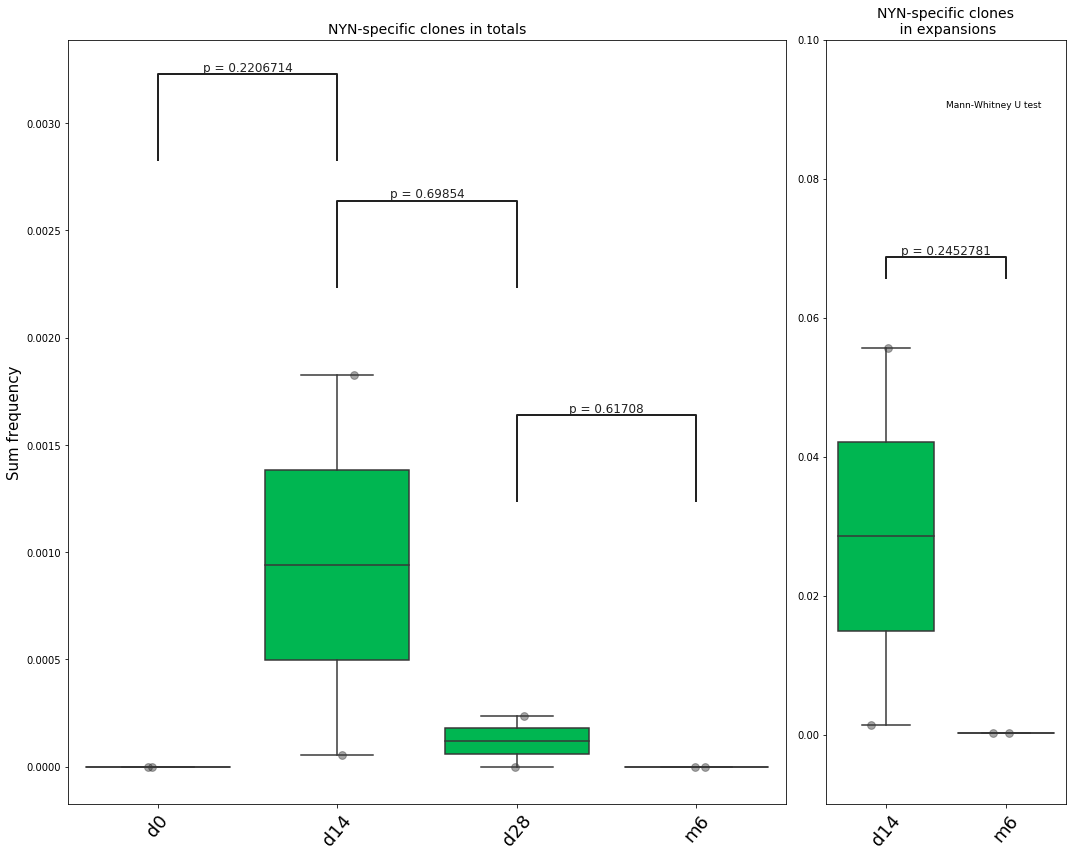

<Figure size 1080x864 with 0 Axes>

In [43]:
#plot all (not separated by epitopes) #Sum freq
from pandas.api.types import CategoricalDtype

f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

summary_timeline_all1 = summary_timeline_all.melt(id_vars=['patient'], 
              value_vars=['freq_d0_epi_specific', 'freq_d14_epi_specific', 'freq_d28_epi_specific',
                          'freq_6m_epi_specific', 'freq_s6m_epi_specific', 'freq_s14d_epi_specific'],
              var_name='day', value_name='sum_freq')
summary_timeline_all2 = summary_timeline_all.melt(id_vars=['patient'], 
              value_vars=['num_d0_epi_specific', 'num_d14_epi_specific', 'num_d28_epi_specific', 'num_6m_epi_specific',
                         'num_s6m_epi_specific', 'num_s14d_epi_specific'], 
              var_name='day', value_name='num')
summary_timeline_all1 = summary_timeline_all1.replace({'freq_d0_epi_specific':'d0',
               'freq_d14_epi_specific':'d14', 'freq_d28_epi_specific':'d28','freq_6m_epi_specific':'m6',
               'freq_s6m_epi_specific':'s6m', 'freq_s14d_epi_specific':'s14d'})
summary_timeline_all2 = summary_timeline_all2.replace({'num_d0_epi_specific':'d0',
               'num_d14_epi_specific':'d14', 'num_d28_epi_specific':'d28','num_6m_epi_specific':'m6',
               'num_s6m_epi_specific':'s6m', 'num_s14d_epi_specific':'s14d'})
summary_timeline_all_melt = summary_timeline_all1.merge(summary_timeline_all2, on=['patient', 'day'])


all_patients_df_dropped_to_plot = summary_timeline_all_melt[(summary_timeline_all_melt['day']!='s6m')&(summary_timeline_all_melt['day']!='s14d')]
box_order = CategoricalDtype(
    ['d0', 'd14', 'd28', 'm6'], 
    ordered=True
)
all_patients_df_dropped_to_plot['day'] = all_patients_df_dropped_to_plot['day'].astype(box_order)
all_patients_df_dropped_to_plot = all_patients_df_dropped_to_plot.sort_values('day')
pallet_wells = ['#00B651']
plt.figure()
plt.rcParams["figure.figsize"] = (15,12)

ax = sns.boxplot(x="day", y="sum_freq", data=all_patients_df_dropped_to_plot, palette=pallet_wells, saturation=1, ax=a0)
plt.sca(a0)
plt.xticks(rotation=50,fontsize=18)
ax.set_ylabel('Sum frequency',fontsize='15')
ax.set_xlabel('')
ax.set_title('NYN-specific clones in totals',fontsize=14)# (0.0000005=0)',fontsize='small')# )

x = np.random.normal(0, 0.06, size=len(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d0']))
a0.scatter(x, all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d0']['sum_freq'], c='#222222', alpha=0.4, s=60)

x = np.random.normal(1, 0.06, size=len(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d14']))
a0.scatter(x, all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d14']['sum_freq'], c='#222222', alpha=0.4, s=60)

x = np.random.normal(2, 0.06, size=len(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d28']))
a0.scatter(x, all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d28']['sum_freq'], c='#222222', alpha=0.4, s=60)

x = np.random.normal(3, 0.06, size=len(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='m6']))
a0.scatter(x, all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='m6']['sum_freq'], c='#222222', alpha=0.4, s=60)


y, h, col = all_patients_df_dropped_to_plot[(all_patients_df_dropped_to_plot['day']=='d14')]['sum_freq'].max() + 0.001, 0.0004, 'k'
a0.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=2, c='#222222')
a0.text(0.5, y+h, 'p = '+str(round(mann_whitney_u_test(list(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d14']['sum_freq']), 
                    list(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d0']['sum_freq']))[1],7)),
                     ha='center', va='bottom', color='#222222', fontsize=12)

y, h, col = all_patients_df_dropped_to_plot[(all_patients_df_dropped_to_plot['day']=='d28')]['sum_freq'].max() + 0.001, 0.0004, 'k'
a0.plot([2, 2, 3, 3], [y, y+h, y+h, y], lw=2, c='#222222')
a0.text(2.5, y+h, 'p = '+str(round(mann_whitney_u_test(list(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d28']['sum_freq']), 
                    list(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='m6']['sum_freq']))[1],5)),
                     ha='center', va='bottom', color='#222222', fontsize=12)

y, h, col = all_patients_df_dropped_to_plot[(all_patients_df_dropped_to_plot['day']=='d28')]['sum_freq'].max() + 0.002, 0.0004, 'k'
a0.plot([2, 2, 1, 1], [y, y+h, y+h, y], lw=2, c='#222222')
a0.text(1.5, y+h, 'p = '+str(round(mann_whitney_u_test(list(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d28']['sum_freq']), 
                    list(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d14']['sum_freq']))[1],5)),
                     ha='center', va='bottom', color='#222222', fontsize=12)

all_patients_df_dropped_to_plot = summary_timeline_all_melt[(summary_timeline_all_melt['day']=='s6m')|(summary_timeline_all_melt['day']=='s14d')]
all_patients_df_dropped_to_plot = all_patients_df_dropped_to_plot.replace({'s6m':'m6', 's14d':'d14'})
box_order = CategoricalDtype(
    ['d14', 'm6'], 
    ordered=True
)
all_patients_df_dropped_to_plot['day'] = all_patients_df_dropped_to_plot['day'].astype(box_order)
all_patients_df_dropped_to_plot = all_patients_df_dropped_to_plot.sort_values('day')
pallet_wells = ['#00B651']

ax = sns.boxplot(x="day", y="sum_freq", data=all_patients_df_dropped_to_plot, palette=pallet_wells, saturation=1,ax=a1)
plt.sca(a1)
plt.xticks(rotation=50,fontsize=18)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_ylim([-0.01, 0.1])
ax.set_title('NYN-specific clones\n in expansions',fontsize=14)# (0.0000005=0)',fontsize='small')# )

x = np.random.normal(0, 0.06, size=len(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d14']))
a1.scatter(x, all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d14']['sum_freq'], c='#222222', alpha=0.4, s=60)

x = np.random.normal(1, 0.06, size=len(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='m6']))
a1.scatter(x, all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='m6']['sum_freq'], c='#222222', alpha=0.4, s=60)


y, h, col = all_patients_df_dropped_to_plot[(all_patients_df_dropped_to_plot['day']=='d14')]['sum_freq'].max() + 0.01, 0.003, 'k'
a1.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=2, c='#222222')
a1.text(0.5, y+h, 'p = '+str(round(mann_whitney_u_test(list(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d14']['sum_freq']), 
                    list(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='m6']['sum_freq']))[1],7)),
         ha='center', va='bottom', color='#222222', fontsize=12)


a1.text(0.9, 0.09, "Mann-Whitney U test",
         ha='center', va='bottom', color='black', fontsize=9)

path_to_png = path_to_5k+'5K(sum_freq).png'
plt.tight_layout()
plt.savefig(path_to_png,bbox_inches='tight', dpi=350)
plt.show()


#Count statistics to table
statistics = pd.DataFrame()

for x in list(summary_timeline_all_melt['day'].unique()):
    for y in list(summary_timeline_all_melt['day'].unique()):
        if (x!=y)&(list(summary_timeline_all_melt[summary_timeline_all_melt['day']==x]['sum_freq'].unique())[0]!=0):
            pval = mann_whitney_u_test(list(summary_timeline_all_melt[summary_timeline_all_melt['day']==x]['sum_freq']), 
                    list(summary_timeline_all_melt[summary_timeline_all_melt['day']==y]['sum_freq']))[1]
            new_row = {'X': x, 'Y': y, 'Pval': pval}
            statistics = statistics.append(new_row, ignore_index=True)
            
path_statistics = path_to_5k+'pval(sum_freq).txt'
statistics.to_csv(path_statistics, sep='\t', index=False)



/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


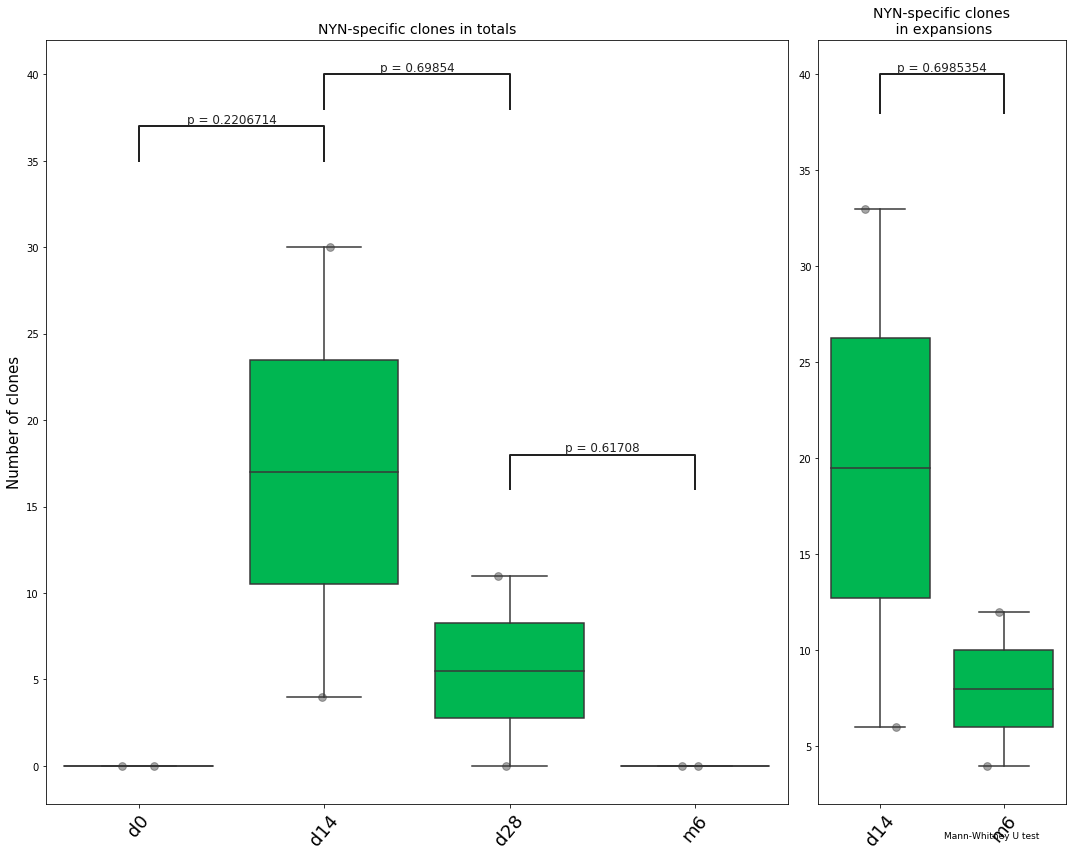

<Figure size 1080x864 with 0 Axes>

In [44]:
#Plot num clones
f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

all_patients_df_dropped_to_plot = summary_timeline_all_melt[(summary_timeline_all_melt['day']!='s6m')&(summary_timeline_all_melt['day']!='s14d')]
box_order = CategoricalDtype(
    ['d0', 'd14', 'd28', 'm6'], 
    ordered=True
)
all_patients_df_dropped_to_plot['day'] = all_patients_df_dropped_to_plot['day'].astype(box_order)
all_patients_df_dropped_to_plot = all_patients_df_dropped_to_plot.sort_values('day')
pallet_wells = ['#00B651']
plt.figure()
plt.rcParams["figure.figsize"] = (15,12)

ax = sns.boxplot(x="day", y="num", data=all_patients_df_dropped_to_plot, palette=pallet_wells, saturation=1, ax=a0)
plt.sca(a0)
plt.xticks(rotation=50,fontsize=18)
ax.set_ylabel('Number of clones',fontsize='15')
ax.set_xlabel('')
ax.set_title('NYN-specific clones in totals',fontsize=14)# (0.0000005=0)',fontsize='small')# )

x = np.random.normal(0, 0.06, size=len(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d0']))
a0.scatter(x, all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d0']['num'], c='#222222', alpha=0.4, s=60)

x = np.random.normal(1, 0.06, size=len(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d14']))
a0.scatter(x, all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d14']['num'], c='#222222', alpha=0.4, s=60)

x = np.random.normal(2, 0.06, size=len(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d28']))
a0.scatter(x, all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d28']['num'], c='#222222', alpha=0.4, s=60)

x = np.random.normal(3, 0.06, size=len(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='m6']))
a0.scatter(x, all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='m6']['num'], c='#222222', alpha=0.4, s=60)


y, h, col = all_patients_df_dropped_to_plot[(all_patients_df_dropped_to_plot['day']=='d14')]['num'].max() + 5, 2, 'k'
a0.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=2, c='#222222')
a0.text(0.5, y+h, 'p = '+str(round(mann_whitney_u_test(list(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d14']['num']), 
                    list(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d0']['num']))[1],7)),
                     ha='center', va='bottom', color='#222222', fontsize=12)

y, h, col = all_patients_df_dropped_to_plot[(all_patients_df_dropped_to_plot['day']=='d28')]['num'].max() + 5, 2, 'k'
a0.plot([2, 2, 3, 3], [y, y+h, y+h, y], lw=2, c='#222222')
a0.text(2.5, y+h, 'p = '+str(round(mann_whitney_u_test(list(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d28']['num']), 
                    list(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='m6']['num']))[1],5)),
                     ha='center', va='bottom', color='#222222', fontsize=12)

y, h, col = all_patients_df_dropped_to_plot[(all_patients_df_dropped_to_plot['day']=='d14')]['num'].max() + 8, 2, 'k'
a0.plot([2, 2, 1, 1], [y, y+h, y+h, y], lw=2, c='#222222')
a0.text(1.5, y+h, 'p = '+str(round(mann_whitney_u_test(list(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d28']['num']), 
                    list(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d14']['num']))[1],5)),
                     ha='center', va='bottom', color='#222222', fontsize=12)

all_patients_df_dropped_to_plot = summary_timeline_all_melt[(summary_timeline_all_melt['day']=='s6m')|(summary_timeline_all_melt['day']=='s14d')]
all_patients_df_dropped_to_plot = all_patients_df_dropped_to_plot.replace({'s6m':'m6', 's14d':'d14'})
box_order = CategoricalDtype(
    ['d14', 'm6'], 
    ordered=True
)
all_patients_df_dropped_to_plot['day'] = all_patients_df_dropped_to_plot['day'].astype(box_order)
all_patients_df_dropped_to_plot = all_patients_df_dropped_to_plot.sort_values('day')
pallet_wells = ['#00B651']

ax = sns.boxplot(x="day", y="num", data=all_patients_df_dropped_to_plot, palette=pallet_wells, saturation=1,ax=a1)
plt.sca(a1)
plt.xticks(rotation=50,fontsize=18)
ax.set_ylabel('')
ax.set_xlabel('')
#ax.set_ylim([-0.01, 0.1])
ax.set_title('NYN-specific clones\n in expansions',fontsize=14)# (0.0000005=0)',fontsize='small')# )

x = np.random.normal(0, 0.06, size=len(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d14']))
a1.scatter(x, all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d14']['num'], c='#222222', alpha=0.4, s=60)

x = np.random.normal(1, 0.06, size=len(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='m6']))
a1.scatter(x, all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='m6']['num'], c='#222222', alpha=0.4, s=60)


y, h, col = all_patients_df_dropped_to_plot[(all_patients_df_dropped_to_plot['day']=='d14')]['num'].max() + 5, 2, 'k'
a1.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=2, c='#222222')
a1.text(0.5, y+h, 'p = '+str(round(mann_whitney_u_test(list(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='d14']['num']), 
                    list(all_patients_df_dropped_to_plot[all_patients_df_dropped_to_plot['day']=='m6']['num']))[1],7)),
         ha='center', va='bottom', color='#222222', fontsize=12)


a1.text(0.9, 0.09, "Mann-Whitney U test",
         ha='center', va='bottom', color='black', fontsize=9)

path_to_png = path_to_5k+'5K(num).png'
plt.tight_layout()
plt.savefig(path_to_png,bbox_inches='tight', dpi=350)
plt.show()


#Count statistics to table
statistics = pd.DataFrame()

for x in list(summary_timeline_all_melt['day'].unique()):
    for y in list(summary_timeline_all_melt['day'].unique()):
        if (x!=y)&(list(summary_timeline_all_melt[summary_timeline_all_melt['day']==x]['sum_freq'].unique())[0]!=0):
            pval = mann_whitney_u_test(list(summary_timeline_all_melt[summary_timeline_all_melt['day']==x]['num']), 
                    list(summary_timeline_all_melt[summary_timeline_all_melt['day']==y]['num']))[1]
            new_row = {'X': x, 'Y': y, 'Pval': pval}
            statistics = statistics.append(new_row, ignore_index=True)
            
path_statistics = path_to_5k+'pval(num).txt'
statistics.to_csv(path_statistics, sep='\t', index=False)

# FigS5A 
## Clustering undef - change table

In [6]:
#Merge all Undef and get CDR3aa
path_all_figs = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/'
path_fig5 = path_all_figs+'Fig5/'
os.makedirs(path_fig5, exist_ok = True)
path_undef_all = path_fig5 + 'all_undef.txt'

all_undef = pd.DataFrame()

all_undef_pathes = glob.glob(path_all_figs+'Fig2/clones_from_venn/*/undef.txt')

#all_cd4_pathes = all_cd4_pathes[:1]
patient_list = [x.split('/')[-2] for x in all_undef_pathes]
for undef_path in all_undef_pathes:
    patient = undef_path.split('/')[-2]
    undef = pd.read_csv(undef_path, delimiter='\t')

    undef_enr_path = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/Fig2/final_enrichment_wells/p'+patient+'/well_1_6m_used/cdr3.enr.vdj.txt'
    undef_enr = pd.read_csv(undef_enr_path, delimiter='\t')
    undef_enr = make_factor_to_plot_column(undef_enr)
    print(len(undef))
    undef = undef.merge(undef_enr, how='left', on='cdr3').drop(columns=['type'])
    undef['patient'] = 'p'+patient
    print(len(undef))
    all_undef = all_undef.append(undef)
    
all_undef_col_split = all_undef['cdr3'].str.split('|')
all_undef['cdr3nt'] = all_undef_col_split.str.get(0)
all_undef['v'] = all_undef_col_split.str.get(1)
all_undef['j'] = all_undef_col_split.str.get(2)

all_undef_w_public_data = pd.DataFrame()
patient_columns = ['p'+x for x in patient_list]
all_undef_distinct = all_undef[all_undef.duplicated(subset=['cdr3aa'], keep=False)==False]
all_undef_distinct['size'] = 1
all_undef_distinct[patient_columns]=0
for patient_num in patient_list:
    all_undef_distinct.loc[all_undef_distinct['patient']=='p'+patient_num, ['p'+patient_num]] = 1.0
all_undef_w_public_data = all_undef_w_public_data.append(all_undef_distinct)
    
all_undef_public = all_undef[all_undef.duplicated(subset=['cdr3aa'], keep=False)]
for cdr3aa_unique in list(all_undef_public['cdr3aa'].unique()):
    undef_this_cdraa = all_undef_public[all_undef_public['cdr3aa']==cdr3aa_unique]
    undef_cdr3aa = undef_this_cdraa.reset_index(drop=True).loc[0,:]
    for patient_num in patient_list:
        undef_cdr3aa['p'+patient_num] = len(undef_this_cdraa[undef_this_cdraa['patient']=='p'+patient_num])
    undef_cdr3aa['size'] = len(undef_this_cdraa)
    if len(undef_this_cdraa['patient'].unique())>1:
        undef_cdr3aa['patient']='public'
    
    if len(undef_this_cdraa['v'].unique()) > 1:
        if len(set([x.split('-')[0] for x in undef_this_cdraa['v'].unique()])) == 1:
            undef_this_cdraa['v'] = list(set([x.split('-')[0] for x in undef_this_cdraa['v'].unique()]))[0]
            print('v', undef_this_cdraa)
        else:
            undef_this_cdraa['v'] = 'Multiple'
            print('v', undef_this_cdraa)
    if len(undef_this_cdraa['j'].unique()) > 1:
        print('j', undef_this_cdraa)
        if len(set([x.split('-')[0] for x in undef_this_cdraa['j'].unique()])) == 1:
            undef_this_cdraa['j'] = list(set([x.split('-')[0] for x in undef_this_cdraa['j'].unique()]))[0]
        else:
            undef_this_cdraa['j'] = 'Multiple'
    all_undef_w_public_data = all_undef_w_public_data.append(undef_cdr3aa)
all_undef_w_public_data = all_undef_w_public_data.reset_index(drop=True)
all_undef_w_public_data.to_csv(path_undef_all, sep='\t', index=False)



64
64
78
78
19
19
40
40
26
26
42
42
15
15
35
35
3
3
10
10
0
0
33
33
1
1
13
13
38
38
48
48
23
23


/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = value
/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

{'1': '#C8C8C8',
 '2': '#929292',
 '3': '#707070',
 '4': '#4D4D4D',
 '9': '#2A2A2A'}

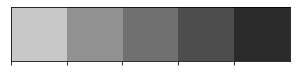

In [7]:
#Clusters colors CD4
clusters_list_cd4 = ['1', '2', '3', '4', '9']
color_clusters = ['#C8C8C8', '#929292', '#707070', '#4D4D4D', '#2A2A2A']
sns.palplot(sns.color_palette(color_clusters))
dict_color_cluster = {x:y for x,y in list(zip(clusters_list_cd4,color_clusters))}
dict_color_cluster

# For Fig S5C - HLA with undef clusters

In [9]:
path_to_undef_w_clusters_data = path_fig5 + 'S5A/undefwith_clusters.txt'
cundef_w_clusters_data = pd.read_csv(path_to_undef_w_clusters_data, delimiter='\t')
path_to_s5c = path_fig5 + 'S5C/'
os.makedirs(path_to_s5c, exist_ok = True)

clusters_list_undef = ['1', '2', '3', '4', '9']
clusters_list_undef_int = [int(x) for x in clusters_list_undef]
people = ['p1792', 'p1790', 'p1775', 'p1800', 'p1810', 'p1752', 'p1813', 'p1802', 'p1782', 'p1771', 
     'p1769', 'p1787', 'p1765', 'p1780', 'p1753', 'p1757', 'p1776']

hla_table_path = path_fig5 + 'Donor_HLA_response.xlsx'
hla_table = pd.read_excel(hla_table_path)
hla_table = hla_table.loc[:, ['Sample', 'HLA_A.0', 'HLA_A.1', 'HLA_B.0', 'HLA_B.1', 'HLA_C.0',
       'HLA_C.1', 'HLA_DRB1.0', 'HLA_DRB1.1', 'HLA_DQB1.0', 'HLA_DQB1.1',
       'HLA_DRB3.0', 'HLA_DRB3.1', 'HLA_DRB4.0', 'HLA_DRB4.1', 'HLA_DRB5.0',
       'HLA_DRB5.1', 'HLA_DQA1.0', 'HLA_DQA1.1', 'HLA_DPA1.0', 'HLA_DPA1.1',
       'HLA_DPB1.0', 'HLA_DPB1.1']]

cluster_data_table = pd.DataFrame(people, columns=['Sample'])
for clust in clusters_list_undef_int:
    good_clusters_undef = cundef_w_clusters_data[cundef_w_clusters_data['cluster'] == clust]
    for patient in people:
        cluster_data_table.loc[cluster_data_table['Sample']==patient, clust] = good_clusters_undef[patient].sum()
        
cluster_data_table['Sample'] = cluster_data_table['Sample'].str.split('p').str.get(-1)      
cluster_data_table['Sample'] = cluster_data_table['Sample'].astype('int')
table_s5c = hla_table.merge(cluster_data_table, on='Sample')
table_s5c_path = path_to_s5c + 'HLA_cluster_table.txt'
table_s5c.to_csv(table_s5c_path, sep='\t', index=False)

# Fig S5D - size of clusters cd4, cd8, undef

In [86]:
# In R

In [94]:
#Count statistics to table
statistics = pd.DataFrame()
path_all_figs = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/'
path_fig5 = path_all_figs+'Fig5/'
path_figs5d = path_fig5+'S5D/'
path_to_counts = path_figs5d + 'sum_num_cl.xlsx'
counts_nums = pd.read_excel(path_to_counts)

for x in list(counts_nums.columns):
    for y in list(counts_nums.columns):
        if x!=y:
            pval = mann_whitney_u_test(list(counts_nums[x].dropna()), 
                    list(counts_nums[y].dropna()))[1]
            new_row = {'X': x, 'Y': y, 'Pval': pval}
            statistics = statistics.append(new_row, ignore_index=True)
      
path_statistics = path_figs5d+'pval(sum_num_cl).txt'
statistics.to_csv(path_statistics, sep='\t', index=False)

statistics


,X,Y,Pval
0,cd4_0,cd8_0,2.632210e-04
1,cd4_0,undef_0,6.516682e-05
2,cd4_0,cd4_1,6.432427e-01
3,cd4_0,cd8_1,1.966673e-06
4,cd4_0,undef_1,1.851456e-05
...,...,...,...
67,undef_2,cd4_1,1.860725e-12
68,undef_2,cd8_1,2.047294e-01
69,undef_2,undef_1,9.711092e-01
70,undef_2,cd4_2,6.666123e-11


In [92]:
cols = list(counts_nums.columns)
counts_nums[cols[0]].dropna()

0     0.123305
1     0.061652
2     0.061652
3     0.154131
4     0.061652
5     0.061652
6     0.123305
7     0.061652
8     0.092478
9     0.092478
10    0.061652
11    0.061652
12    0.061652
13    0.061652
14    0.061652
15    0.061652
16    0.061652
17    0.061652
18    0.092478
19    0.061652
20    0.215783
21    0.061652
22    0.123305
23    0.092478
24    0.061652
25    0.061652
26    0.061652
27    0.061652
28    0.061652
29    0.061652
30    0.092478
31    0.061652
32    0.092478
33    0.061652
Name: cd4_0, dtype: float64

# Fig S5E - clustered vs non clustered pval

In [6]:
path_all_figs = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/'
path_fig5 = path_all_figs+'Fig5/'
path_figs5d = path_fig5 + 'S5D/'

table_path = path_figs5d + 'CLus_unclus_fig5.xlsx'
table = pd.read_excel(table_path)

statistics = pd.DataFrame()
for x in table.columns:
    for y in table.columns:
        if x!=y:
            pval = mann_whitney_u_test(list(table[x].dropna()), 
                    list(table[y].dropna()))[1]
            new_row = {'X': x, 'Y': y, 'Pval': pval}
            statistics = statistics.append(new_row, ignore_index=True)
            
path_statistics = path_figs5d+'pval(CLus_unclus_fig5).txt'
statistics.to_csv(path_statistics, sep='\t', index=False)

# Fig S5H - clustering YLQ with dbs

In [6]:
#Prepare tables for VDJmatch

path_all_figs = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/'
path_fig5 = path_all_figs+'Fig5/'
path_fig4 = path_all_figs+'Fig4/'
path_fig5H = path_fig5 + 'S5H/'
os.makedirs(path_fig5H, exist_ok = True)
path_epi_res_table = path_fig5H + 'all_epi_clones.txt'

path_epi_all = path_fig4 + 'good_all_epi_clones.txt'
epi = pd.read_csv(path_epi_all, delimiter='\t')
epi['count'] = epi['patient']


epi_col_split = epi['factor'].str.split('|')
epi['cdr3nt'] = epi_col_split.str.get(0)
epi['v'] = epi_col_split.str.get(1)
epi['j'] = epi_col_split.str.get(2)
epi['d']=''
epi['freq']=0.1
epi = epi.loc[:, ['count', 'freq', 'cdr3nt', 'cdr3aa', 'v', 'd', 'j']]
epi.to_csv(path_epi_res_table, sep='\t', index=False)
epi

,count,freq,cdr3nt,cdr3aa,v,d,j
0,1752,0.1,TGTGCCTGGAGTGTAGGTACCTCTGGGAACTATGGCTACACCTTC,CAWSVGTSGNYGYTF,TRBV30,,TRBJ1-2
1,1752,0.1,TGCGCCAGCAGCCAAGAGGCAGGTGAAATCAATCAGCCCCAGCATTTT,CASSQEAGEINQPQHF,TRBV4-3,,TRBJ1-5
2,1752,0.1,TGCGCCAGCAGCCAAGAATGGGAAAATAACTATGGCTACACCTTC,CASSQEWENNYGYTF,TRBV4-1,,TRBJ1-2
3,1752,0.1,TGTGCCAGCAGTTTAGGGACAGGCCACAATGAGCAGTTCTTC,CASSLGTGHNEQFF,TRBV27,,TRBJ2-1
4,1752,0.1,TGCGCCAGCAGCCAAGAATGGGAGACCAATCAGCCCCAGCATTTT,CASSQEWETNQPQHF,TRBV4-1,,TRBJ1-5
...,...,...,...,...,...,...,...
479,1792,0.1,TGTGCCAGCAGCCAAACTTACGAGCAGTACTTC,CASSQTYEQYF,TRBV11-2,,TRBJ2-7
480,1792,0.1,TGTGCCAGCAGCCCCCTTGCTGAAAAACTGTTTTTT,CASSPLAEKLFF,TRBV11-2,,TRBJ1-4
481,1792,0.1,TGCAGTGCTAGAGCCCCGGGGATGGATAATTCACCCCTCCACTTT,CSARAPGMDNSPLHF,TRBV20-1,,TRBJ1-6
482,1792,0.1,TGCAGTGCTACGGCACTAGTCGAGCAGTACTTC,CSATALVEQYF,TRBV20-1,,TRBJ2-7


In [7]:
#Write metadata
path_all_figs = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/'
path_fig5 = path_all_figs+'Fig5/'
path_fig4 = path_all_figs+'Fig4/'
path_fig5H = path_fig5 + 'S5H/'


metadata = pd.DataFrame()
path_start_files = path_fig5H + '*.txt'

metadata['file_name'] = glob.glob(path_start_files)#[x.replace(' ', '\ ') for x in glob.glob(path_start_files)]
metadata['sample_id'] = metadata['file_name'].str.split('/').str.get(-1).str.split('.').str.get(0).str.split('_').str.get(1)

path_to_meta = '/Users/labuser/Desktop/Codes for Petrovax/vdjmatch_vdjdb_adaptive/metadata_epi.txt'
metadata.to_csv(path_to_meta, sep='\t', index=False)

In [9]:
#Make VDJmatch code
path_all_figs = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/'
path_fig5 = path_all_figs+'Fig5/'
path_to_5h = path_fig5+'5H/'

var = ['1,0,1']
prefixes = [' v']

new_file = "/Users/labuser/Desktop/Codes for Petrovax/vdjmatch_vdjdb_adaptive/vdjmatch_epi.sh"
fi = open(new_file,"w+")

path_to_result = path_to_5h + 'results/'
mkdir = 'mkdir ' + path_to_result.replace(' ', '\ ') + "\n"
fi.write(mkdir)

a = 'cd ' + path_to_result.replace(' ', '\ ') + "\n"
fi.write(a)

path_to_meta = '/Users/labuser/Desktop/Codes\ for\ Petrovax/vdjmatch_vdjdb_adaptive/metadata_epi.txt'
metadata = '-m '+ path_to_meta

for pre in prefixes:
    gene = 'TRB'
    if pre == ' vj':
        match = '--v-match --j-match'
    elif pre == ' v':
        match = '--v-match'
    else:
        match = ''
    path_to_df = '/Users/labuser/Desktop/Codes\ for\ Petrovax/vdjmatch_vdjdb_adaptive/vdjdb-db-master-all/database/vdjdb'

    for variation in var:
        name = '-' + variation
        prefix = pre + variation
        indel = ' -O '
        summary = '--summary-columns antigen.gene,antigen.epitope,mhc.class,meta '
        command = 'java -jar /Users/labuser/Desktop/vdjmatch-1.3.1/vdjmatch-1.3.1.jar match -R ' + gene + ' -S human --filter="__antigen.species__=~\'SARS-CoV-2\'" ' + summary + match + indel + str(variation) + ' --database ' + path_to_df +  ' --min-epi-size 1 ' + metadata + prefix + "\n"
        fi.write(command)
    print(pre)
        #s = 'cd ../ \n'
        #fi.write(s)

fi.close() 

 v


In [62]:
#After VDJmatch - edit result table
path_all_figs = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/'
path_fig5 = path_all_figs+'Fig5/'
path_fig4 = path_all_figs+'Fig4/'
path_to_s5h = path_fig5+'S5H/'
result_table_path = path_to_s5h + 'results/v1,0,1.epi.txt'
path_to_result = path_to_s5h+'epi_w_db.txt'
path_to_result_ylq = path_to_s5h+'epi_w_db_only_YLQ.txt'

result_table = pd.read_csv(result_table_path, delimiter='\t')
result_table['meta.subject.cohort']=result_table['meta'].str.split('subject.cohort": "').str.get(-1).str.split('", "').str.get(0)

#get MIRA Jgenes
mira_pathi = '/Users/labuser/Desktop/Codes for Petrovax/vdjmatch_vdjdb_adaptive/vdjdb-db-master-all/chunks/chunki.txt'
mira_i = pd.read_csv(mira_pathi, delimiter='\t')
mira_i = mira_i.loc[:, ['j.beta', 'meta.subject.cohort']]
mira_pathii = '/Users/labuser/Desktop/Codes for Petrovax/vdjmatch_vdjdb_adaptive/vdjdb-db-master-all/chunks/chunkii.txt'
mira_ii = pd.read_csv(mira_pathii, delimiter='\t')
mira_ii = mira_ii.loc[:, ['j.beta', 'meta.subject.cohort']]
mira = mira_ii.append(mira_i)
mira['j.beta'] = ['TRBJ'+x[5]+'-'+x[-1] for x in mira['j.beta']]
mira['j.beta'] = mira['j.beta'].replace('TRBJ2-X', 'TRBJ2')

result_table = result_table.merge(mira, how='left', on='meta.subject.cohort')
result_table.loc[result_table['j.segm']!=result_table['j.segm'],['j.segm']]=result_table['j.beta']

epitopes = result_table['meta'].str.split('"study.id": "').str.get(-1).str.split('", "').str.get(0)
database = result_table['meta'].str.split('subject.id": "').str.get(-1).str.split('", "').str.get(0)
database = ['VDJdb' if x != 'MIRA' else x for x in database]
result_table['patient'] = database
result_table['epitope'] = epitopes
result_table.loc[result_table['epitope']=='',['epitope']]=result_table['antigen.epitope']
result_table['epi']=[x[:3] for x in result_table['epitope']]
result_table.loc[:,['epi']] = result_table['epi'].replace('NYL', 'NYN').replace('LSP', 'SPR')
epi_dict = {}
for epi in list(result_table['epi'].unique()):
    epi_dict[epi]=list(result_table[result_table['epi']==epi]['epitope'].unique())
result_table['v'] = result_table['v.segm'].str.split('*').str.get(0)
result_table['j'] = result_table['j.segm'].str.split('*').str.get(0)
result_table['cdr3aa'] = result_table['cdr3']
result_table = result_table.loc[:, ['cdr3nt', 'cdr3aa', 'v', 'j', 'patient', 'epi']]#,'antigen.gene']]
result_table.drop_duplicates(inplace=True)#.reset_index(drop=True)
result_table.reset_index(drop=True,inplace=True)
result_table['database'] = 1

#Load all patients clones
path_to_epi = path_fig4 + 'good_all_epi_clones.txt'
epi = pd.read_csv(path_to_epi, delimiter='\t')
epi.rename(columns={'type':'epi'}, inplace=True)
epi['cdr3nt'] = epi['factor'].str.split('|').str.get(0)
epi['v'] = epi['factor'].str.split('|').str.get(1)
epi['j'] = epi['factor'].str.split('|').str.get(2)
epi['patient']=['p'+str(x) for x in epi['patient']]
epi['database']=0
epi = epi.loc[:, ['cdr3nt', 'cdr3aa', 'v', 'j', 'patient', 'epi', 'database']]
print(len(epi))
#Add cluster data
path_to_epi_clust_1 = path_fig5 + '5G/epi_RLQ-KCY-IEDwith_clusters.txt'
epi_clust_1 = pd.read_csv(path_to_epi_clust_1, delimiter='\t')
epi_clust_1 = epi_clust_1.loc[:, ['cdr3aa', 'cluster']].drop_duplicates()
path_to_epi_clust_2 = path_fig5 + '5G/YLQ-FCN-QYI-QQLwith_clusters.txt'
epi_clust_2 = pd.read_csv(path_to_epi_clust_2, delimiter='\t')
epi_clust_2 = epi_clust_2.loc[:, ['cdr3aa', 'cluster']].drop_duplicates()
epi_clust = epi_clust_2.append(epi_clust_1)
epi = epi.merge(epi_clust, how='left', on='cdr3aa')
epi = epi.rename(columns={'cluster':'old_cluster'})
print(len(epi))

epi_w_db = epi.append(result_table)
epi_w_db['epi_label']=epi_w_db['epi']

all_epi_w_public_data = pd.DataFrame()
patient_list = list(epi_w_db['patient'].unique())
patient_columns = patient_list

all_epi_distinct = epi_w_db[epi_w_db.duplicated(subset=['cdr3aa'], keep=False)==False]
all_epi_distinct['size'] = 1
all_epi_distinct[patient_columns]=0
for patient_num in patient_list:
    all_epi_distinct.loc[all_epi_distinct['patient']==patient_num, [patient_num]] = 1.0
all_epi_w_public_data = all_epi_w_public_data.append(all_epi_distinct)
    
all_epi_public = epi_w_db[epi_w_db.duplicated(subset=['cdr3aa'], keep=False)]
for cdr3aa_unique in list(all_epi_public['cdr3aa'].unique()):
    epi_this_cdraa = all_epi_public[all_epi_public['cdr3aa']==cdr3aa_unique]
    epi_cdr3aa = epi_this_cdraa.reset_index(drop=True).loc[0,:]
    for patient_num in patient_list:
        epi_cdr3aa[patient_num] = len(epi_this_cdraa[epi_this_cdraa['patient']==patient_num])
    epi_cdr3aa['size'] = len(epi_this_cdraa)
    if len(epi_this_cdraa['patient'].unique())>1:
        epi_cdr3aa['patient']='public'
    if epi_this_cdraa['database'].sum()>0:
        epi_cdr3aa['database']=1
    if len(epi_this_cdraa['v'].unique()) > 1:
        if len(set([x.split('-')[0] for x in epi_this_cdraa['v'].unique()])) == 1:
            epi_cdr3aa['v'] = list(set([x.split('-')[0] for x in epi_this_cdraa['v'].unique()]))[0]
            #print('v', epi_this_cdraa)
        else:
            epi_cdr3aa['v'] = '_'.join(list(epi_this_cdraa['v'].unique()))
            #print('v', epi_this_cdraa)
    if len(epi_this_cdraa['j'].unique()) > 1:
        print('j', cdr3aa_unique)
        if len(set([x.split('-')[0] for x in epi_this_cdraa['j'].unique()])) == 1:
            epi_cdr3aa['j'] = list(set([x.split('-')[0] for x in epi_this_cdraa['j'].unique()]))[0]
        else:
            epi_cdr3aa['j'] = '_'.join(list(epi_this_cdraa['j'].unique()))
    if len(epi_this_cdraa['epi'].unique()) > 1:
        #print('_'.join(list(epi_this_cdraa['epi'].unique())))
        epi_cdr3aa['epi_label'] = '_'.join(list(epi_this_cdraa['epi'].unique()))
        epi_cdr3aa['epi'] = list(epi_this_cdraa['epi'].unique())[0]
    if len(epi_this_cdraa['old_cluster'].unique()) > 1:
        epi_cdr3aa['old_cluster'] = '_'.join([str(x) for x in list(epi_this_cdraa['old_cluster'].unique())])
    all_epi_w_public_data = all_epi_w_public_data.append(epi_cdr3aa)
all_epi_w_public_data = all_epi_w_public_data.reset_index(drop=True)
all_epi_w_public_data.to_csv(path_to_result, sep='\t', index=False)
all_epi_w_public_data=all_epi_w_public_data.loc[(all_epi_w_public_data['epi']=='YLQ')].reset_index(drop=True)
all_epi_w_public_data.to_csv(path_to_result_ylq, sep='\t', index=False)
all_epi_w_public_data#['epi_label'].unique()

484
484


/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = value
/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

j CASSLDIEQYF


,cdr3nt,cdr3aa,v,j,patient,epi,database,old_cluster,epi_label,size,...,p1753,p1776,p1800,p1780,p1802,p1771,p1787,p1792,VDJdb,MIRA
0,TGCGCCAGCCTAGATCTTGACACCGGGGAGCTGTTTTTT,CASLDLDTGELFF,TRBV5-1,TRBJ2-2,p1752,YLQ,0,1.0,YLQ,1,...,0,0,0,0,0,0,0,0,0,0
1,TGTGCCAGTATATTTAGATTTGAAGGCTACGAGCAGTACTTC,CASIFRFEGYEQYF,TRBV19,TRBJ2-7,p1752,YLQ,0,NaN,YLQ,1,...,0,0,0,0,0,0,0,0,0,0
2,TGTGCCAGCAGCCCAGACATCCTAGCTTTCTTT,CASSPDILAFF,TRBV7-9,TRBJ1-1,p1752,YLQ,0,2.0,YLQ,1,...,0,0,0,0,0,0,0,0,0,0
3,TGTGCCACCAGTGACCCAGACAGTTTGCGAGCTTTCTTT,CATSDPDSLRAFF,TRBV24-1,TRBJ1-1,p1752,YLQ,0,NaN,YLQ,1,...,0,0,0,0,0,0,0,0,0,0
4,TGTGCTCTCGACGGGGACAAGAACACCGGGGAGCTGTTTTTT,CALDGDKNTGELFF,TRBV2,TRBJ2-2,p1752,YLQ,0,NaN,YLQ,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,TGTGCCAGCCAGGACGCGAACACCGGGGAGCTGTTTTTT,CASQTANTGELFF,TRBV19,TRBJ2-2,public,YLQ,1,NaN,YLQ,2,...,0,0,0,0,0,0,0,0,1,1
238,TGTGCCAGCCAGGACGCGAACACCGGGGAGCTGTTTTTT,CASQDGNTGELFF,TRBV19,TRBJ2-2,MIRA,YLQ,1,NaN,YLQ,2,...,0,0,0,0,0,0,0,0,0,2
239,TGTGCCAGCCAGGACGCGAACACCGGGGAGCTGTTTTTT,CASQDPNTGELFF,TRBV19,TRBJ2-2,MIRA,YLQ,1,NaN,YLQ,2,...,0,0,0,0,0,0,0,0,0,2
240,TGTGCCAGCCAGGACGCGAACACCGGGGAGCTGTTTTTT,CASQDTNTGELFF,TRBV19,TRBJ2-2,MIRA,YLQ,1,NaN,YLQ,2,...,0,0,0,0,0,0,0,0,0,2


In [65]:
#After VDJmatch - edit result table
path_all_figs = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/'
path_fig5 = path_all_figs+'Fig5/'
path_fig4 = path_all_figs+'Fig4/'
path_to_s5h = path_fig5+'S5H/'
result_table_path = path_to_s5h + 'results/v1,0,1.epi.txt'
path_to_result = path_to_s5h+'epi_w_db.txt'
path_to_result_ylq = path_to_s5h+'epi_w_db_only_YLQ.txt'

result_table = pd.read_csv(result_table_path, delimiter='\t')
result_table['meta.subject.cohort']=result_table['meta'].str.split('subject.cohort": "').str.get(-1).str.split('", "').str.get(0)

#get MIRA Jgenes
mira_pathi = '/Users/labuser/Desktop/Codes for Petrovax/vdjmatch_vdjdb_adaptive/vdjdb-db-master-all/chunks/chunki.txt'
mira_i = pd.read_csv(mira_pathi, delimiter='\t')
mira_i = mira_i.loc[:, ['j.beta', 'meta.subject.cohort']]
mira_pathii = '/Users/labuser/Desktop/Codes for Petrovax/vdjmatch_vdjdb_adaptive/vdjdb-db-master-all/chunks/chunkii.txt'
mira_ii = pd.read_csv(mira_pathii, delimiter='\t')
mira_ii = mira_ii.loc[:, ['j.beta', 'meta.subject.cohort']]
mira = mira_ii.append(mira_i)
mira['j.beta'] = ['TRBJ'+x[5]+'-'+x[-1] for x in mira['j.beta']]
mira['j.beta'] = mira['j.beta'].replace('TRBJ2-X', 'TRBJ2')

result_table = result_table.merge(mira, how='left', on='meta.subject.cohort')
result_table.loc[result_table['j.segm']!=result_table['j.segm'],['j.segm']]=result_table['j.beta']

epitopes = result_table['meta'].str.split('"study.id": "').str.get(-1).str.split('", "').str.get(0)
database = result_table['meta'].str.split('subject.id": "').str.get(-1).str.split('", "').str.get(0)
database = ['VDJdb' if x != 'MIRA' else x for x in database]
result_table['patient'] = database
result_table['epitope'] = epitopes
result_table.loc[result_table['epitope']=='',['epitope']]=result_table['antigen.epitope']
result_table['epi']=[x[:3] for x in result_table['epitope']]
result_table.loc[:,['epi']] = result_table['epi'].replace('NYL', 'NYN').replace('LSP', 'SPR')
epi_dict = {}
for epi in list(result_table['epi'].unique()):
    epi_dict[epi]=list(result_table[result_table['epi']==epi]['epitope'].unique())
result_table['v'] = result_table['v.segm'].str.split('*').str.get(0)
result_table['j'] = result_table['j.segm'].str.split('*').str.get(0)
result_table['cdr3aa'] = result_table['cdr3']
result_table = result_table.loc[:, ['cdr3nt', 'cdr3aa', 'v', 'j', 'patient', 'epi']]#,'antigen.gene']]
result_table.drop_duplicates(inplace=True)#.reset_index(drop=True)
result_table.reset_index(drop=True,inplace=True)
result_table['database'] = 1

#Load all patients clones
path_to_epi = path_fig4 + 'good_all_epi_clones.txt'
epi = pd.read_csv(path_to_epi, delimiter='\t')
epi.rename(columns={'type':'epi'}, inplace=True)
epi['cdr3nt'] = epi['factor'].str.split('|').str.get(0)
epi['v'] = epi['factor'].str.split('|').str.get(1)
epi['j'] = epi['factor'].str.split('|').str.get(2)
epi['patient']=['p'+str(x) for x in epi['patient']]
epi['database']=0
epi = epi.loc[:, ['cdr3nt', 'cdr3aa', 'v', 'j', 'patient', 'epi', 'database']]
print(len(epi))
#Add cluster data
path_to_epi_clust_1 = path_fig5 + '5G/epi_RLQ-KCY-IEDwith_clusters.txt'
epi_clust_1 = pd.read_csv(path_to_epi_clust_1, delimiter='\t')
epi_clust_1 = epi_clust_1.loc[:, ['cdr3aa', 'cluster']].drop_duplicates()
path_to_epi_clust_2 = path_fig5 + '5G/YLQ-FCN-QYI-QQLwith_clusters.txt'
epi_clust_2 = pd.read_csv(path_to_epi_clust_2, delimiter='\t')
epi_clust_2 = epi_clust_2.loc[:, ['cdr3aa', 'cluster']].drop_duplicates()
epi_clust = epi_clust_2.append(epi_clust_1)
epi = epi.merge(epi_clust, how='left', on='cdr3aa')
epi = epi.rename(columns={'cluster':'old_cluster'})
print(len(epi))

epi_w_db = epi.append(result_table)
epi_w_db['epi_label']=epi_w_db['epi']

all_epi_w_public_data = pd.DataFrame()
patient_list = list(epi_w_db['patient'].unique())
patient_columns = patient_list

all_epi_distinct = epi_w_db[epi_w_db.duplicated(subset=['cdr3aa'], keep=False)==False]
all_epi_distinct['size'] = 1
all_epi_distinct[patient_columns]=0
for patient_num in patient_list:
    all_epi_distinct.loc[all_epi_distinct['patient']==patient_num, [patient_num]] = 1.0
all_epi_w_public_data = all_epi_w_public_data.append(all_epi_distinct)
    
all_epi_public = epi_w_db[epi_w_db.duplicated(subset=['cdr3aa'], keep=False)]
for cdr3aa_unique in list(all_epi_public['cdr3aa'].unique()):
    epi_this_cdraa = all_epi_public[all_epi_public['cdr3aa']==cdr3aa_unique]
    epi_cdr3aa = epi_this_cdraa.reset_index(drop=True).loc[0,:]
    for patient_num in patient_list:
        epi_cdr3aa[patient_num] = len(epi_this_cdraa[epi_this_cdraa['patient']==patient_num])
    epi_cdr3aa['size'] = len(epi_this_cdraa)
    if len(epi_this_cdraa['patient'].unique())>1:
        epi_cdr3aa['patient']='public'
    if epi_this_cdraa['database'].sum()>0:
        epi_cdr3aa['database']=1
    if len(epi_this_cdraa['v'].unique()) > 1:
        if len(set([x.split('-')[0] for x in epi_this_cdraa['v'].unique()])) == 1:
            epi_cdr3aa['v'] = list(set([x.split('-')[0] for x in epi_this_cdraa['v'].unique()]))[0]
            #print('v', epi_this_cdraa)
        else:
            epi_cdr3aa['v'] = '_'.join(list(epi_this_cdraa['v'].unique()))
            #print('v', epi_this_cdraa)
    if len(epi_this_cdraa['j'].unique()) > 1:
        print('j', cdr3aa_unique)
        if len(set([x.split('-')[0] for x in epi_this_cdraa['j'].unique()])) == 1:
            epi_cdr3aa['j'] = list(set([x.split('-')[0] for x in epi_this_cdraa['j'].unique()]))[0]
        else:
            epi_cdr3aa['j'] = '_'.join(list(epi_this_cdraa['j'].unique()))
    if len(epi_this_cdraa['epi'].unique()) > 1:
        #print('_'.join(list(epi_this_cdraa['epi'].unique())))
        epi_cdr3aa['epi_label'] = '_'.join(list(epi_this_cdraa['epi'].unique()))
        epi_cdr3aa['epi'] = list(epi_this_cdraa['epi'].unique())[0]
    if len(epi_this_cdraa['old_cluster'].unique()) > 1:
        epi_cdr3aa['old_cluster'] = '_'.join([str(x) for x in list(epi_this_cdraa['old_cluster'].unique())])
    all_epi_w_public_data = all_epi_w_public_data.append(epi_cdr3aa)
all_epi_w_public_data = all_epi_w_public_data.reset_index(drop=True)
all_epi_w_public_data.to_csv(path_to_result, sep='\t', index=False)
all_epi_w_public_data=all_epi_w_public_data.loc[(all_epi_w_public_data['epi']=='YLQ')].reset_index(drop=True)
all_epi_w_public_data.to_csv(path_to_result_ylq, sep='\t', index=False)
all_epi_w_public_data#['epi_label'].unique()

Index(['cdr3nt', 'cdr3aa', 'v', 'j', 'patient', 'epi', 'database',
       'old_cluster', 'epi_label', 'size', 'p1752', 'p1775', 'p1782', 'p1810',
       'p1813', 'p1753', 'p1776', 'p1800', 'p1780', 'p1802', 'p1771', 'p1787',
       'p1792', 'VDJdb', 'MIRA'],
      dtype='object')

In [31]:
#Correct VJusage YLQ clusters
path_all_figs = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/'
path_fig5 = path_all_figs+'Fig5/'
path_to_s5h = path_fig5+'S5H/'
path_to_vj = path_to_s5h + 'VJ_usage/'
os.makedirs(path_to_vj, exist_ok = True)


path_to_df = path_to_s5h + 'epi_YLQ_w_dbs_ham_2with_clusters.txt'
clust_ylq = pd.read_csv(path_to_df, delimiter='\t')
clust_ylq = clust_ylq.loc[clust_ylq['cluster']==clust_ylq['cluster'], :]
#clust_ylq1 = clust_ylq.loc[clust_ylq['cluster']==1]
v_genes_to_change = [x for x in list(clust_ylq.v.unique()) if '_' in x]
v_genes_not_to_change = [x for x in list(clust_ylq.v.unique()) if '_' not in x]
df_changed = clust_ylq.loc[clust_ylq['v'].isin(v_genes_not_to_change)]
for v_gene in v_genes_to_change:
    cdr3s_w_v_gene = clust_ylq.loc[clust_ylq['v']==v_gene].reset_index(drop=True)
    for new_v in v_gene.split('_'):
        cdr3s_new_v_and_size = cdr3s_w_v_gene.copy()
        cdr3s_new_v_and_size['v']=new_v
        if cdr3s_w_v_gene.loc[0,'size']==2:
            cdr3s_new_v_and_size['size']=1
            print(v_gene, new_v, 1, cdr3s_new_v_and_size.loc[0,'cdr3aa'])
        else:
            if (new_v == 'TRBV2')&(cdr3s_new_v_and_size.loc[0,'cdr3aa']=='CASSEANTGELFF'):
                cdr3s_new_v_and_size['size']=2
                print(v_gene, new_v, 2, cdr3s_new_v_and_size.loc[0,'cdr3aa'])
            elif (new_v == 'TRBV6-5')&(cdr3s_new_v_and_size.loc[0,'cdr3aa']=='CASTDLNTGELFF'):
                cdr3s_new_v_and_size['size']=2
                print(v_gene, new_v, 2, cdr3s_new_v_and_size.loc[0,'cdr3aa'])
            else:
                cdr3s_new_v_and_size['size']=1
                print(v_gene, new_v, 1, cdr3s_new_v_and_size.loc[0,'cdr3aa'])
        df_changed = df_changed.append(cdr3s_new_v_and_size)

path_to_res = path_to_vj + 'YLQ_in_clust_correct_V_genes.txt'
df_changed.to_csv(path_to_res, sep='\t', index=False)

TRBV5-1_TRBV7-9 TRBV5-1 1 CASGTANTGELFF
TRBV5-1_TRBV7-9 TRBV7-9 1 CASGTANTGELFF
TRBV7-9_TRBV2 TRBV7-9 1 CASSEANTGELFF
TRBV7-9_TRBV2 TRBV2 2 CASSEANTGELFF
TRBV6-5_TRBV2 TRBV6-5 2 CASTDLNTGELFF
TRBV6-5_TRBV2 TRBV2 1 CASTDLNTGELFF
TRBV15_TRBV5-4 TRBV15 1 CATSDRNTGELFF
TRBV15_TRBV5-4 TRBV5-4 1 CATSDRNTGELFF


In [27]:
df_changed

,cdr3aa,cdr3nt,v,j,patient,epi,database,old_cluster,epi_label,size,...,p1800,p1780,p1802,p1771,p1787,p1792,VDJdb,MIRA,together,cluster
0,CAAGGANTGELFF,TGTGCCGCCGGCGGAGCAAACACCGGGGAGCTGTTTTTT,TRBV7-9,TRBJ2-2,public,YLQ,0,1.0,YLQ,2,...,0,0,0,0,0,0,0,0,0|1|0|1|0|0|0|0|0|0|0|0|0|0|0,1.0
1,CACQDRNTGELFF,TGTGCCTGCCAGGACAGAAACACCGGGGAGCTGTTTTTT,TRBV30,TRBJ2-2,p1810,YLQ,0,1.0,YLQ,1,...,0,0,0,0,0,0,0,0,0|0|0|1|0|0|0|0|0|0|0|0|0|0|0,1.0
3,CAGGDDNTGELFF,TGCGCGGGGGGGGACGACAACACCGGGGAGCTGTTTTTT,TRBV5-1,TRBJ2-2,p1775,YLQ,0,1.0,YLQ,1,...,0,0,0,0,0,0,0,0,0|1|0|0|0|0|0|0|0|0|0|0|0|0|0,1.0
4,CAGQDLGTGELFF,TGTGCCGGACAAGACTTAGGCACCGGGGAGCTGTTTTTT,TRBV7-8,TRBJ2-2,p1810,YLQ,0,1.0,YLQ,1,...,0,0,0,0,0,0,0,0,0|0|0|1|0|0|0|0|0|0|0|0|0|0|0,1.0
5,CAGQDSNTGELFF,TGTGCCAGCCAGGACTCAAACACCGGGGAGCTGTTTTTT,TRBV19,TRBJ2-2,VDJdb,YLQ,1,NaN,YLQ,1,...,0,0,0,0,0,0,1,0,0|0|0|0|0|0|0|0|0|0|0|0|0|1|0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,CSARDSMAQNTGELFF,TGCAGTGCTAGAGATAGTCTAGCGCAGAACACCGGGGAGCTGTTTTTT,TRBV20-1,TRBJ2-2,VDJdb,YLQ,1,NaN,YLQ,1,...,0,0,0,0,0,0,1,0,0|0|0|0|0|0|0|0|0|0|0|0|0|1|0,3.0
233,CSARDSRAQNTGELFF,TGCAGTGCTAGAGATAGTCTAGCGCAGAACACCGGGGAGCTGTTTTTT,TRBV20-1,TRBJ2-2,VDJdb,YLQ,1,NaN,YLQ,1,...,0,0,0,0,0,0,1,0,0|0|0|0|0|0|0|0|0|0|0|0|0|1|0,3.0
234,CSARDSVAVNTGELFF,TGCAGTGCTAGAGATGATGTAGCGGTGAACACCGGGGAGCTGTTTTTT,TRBV20-1,TRBJ2-2,VDJdb,YLQ,1,NaN,YLQ,1,...,0,0,0,0,0,0,1,0,0|0|0|0|0|0|0|0|0|0|0|0|0|1|0,3.0
0,CASSEANTGELFF,TGTGCCAGCAGCCATGCGAACACCGGGGAGCTGTTTTTT,TRBV7-9,TRBJ2-2,public,YLQ,1,NaN,YLQ,1,...,0,0,0,0,0,0,1,2,0|0|0|0|0|0|0|0|0|0|0|0|0|1|2,1.0


In [20]:
CASSEANTGELFF


True

# Fig S5G - Size of the clonotypes belonging to clusters
### Я думаю, что имеет смысл сравнить среднюю частоту клонов, принадлежащих к какому-либо кластеру, и спайк-специфичных, но не принадлежащих к кластерам, и в экспансии и в тотале 14 дня (во втором случае стоит учитывать клоны с нулевым размером)

In [78]:
def make_factor_nt_days(df,day):
    df = df.rename(columns={'freq':'freq_'+day, 'count': 'count_'+day})
    df['factor'] = df['cdr3nt'].map(str) + '|' + df['v'].map(str) + '|' + df['j'].map(str)
    df = df[['factor', 'freq_'+day, 'count_'+day]]#'freq', 'count']]
    return df

no_w2 = ['1769']
no_d28 = ['1802']
no_s6m = ['1775', '1782']
no_6m = ['1775', '1790']

empty_df = pd.DataFrame(columns=['count', 'freq', 'cdr3nt', 'cdr3aa', 'v', 'd', 'j', 'VEnd', 'DStart',
       'DEnd', 'JStart'])

In [83]:
#Load CD4 in clusters and merge with full cd4 data
from_home=False
if from_home==True:
    path_all_figs = '/Users/macbook/Downloads/check codes and results/'
else:
    path_all_figs = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/'
path_fig5 = path_all_figs+'Fig5/'
path_s5g = path_fig5+'S5G/'
os.makedirs(path_s5g, exist_ok = True)
path_cd4 = path_s5g+'CD4/'
os.makedirs(path_cd4, exist_ok = True)


path_all_wells = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/wells/nc.vdj.p'

cd4_in_clust_path = path_fig5 + '5A/cd4with_clusters.txt'
cd4_in_clust = pd.read_csv(cd4_in_clust_path, delimiter='\t')
cd4_in_clust = cd4_in_clust.loc[:, ['cdr3aa', 'cluster', 'patient', 'size']]
good_clusters_cd4 = [1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 
                     23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 
                     46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 
                     73, 75, 76, 77, 79, 80, 81, 82, 83, 87, 88, 89, 91, 92, 93, 99, 107, 108, 111, 114]
good_cd4 = cd4_in_clust[(cd4_in_clust['cluster'].isin(good_clusters_cd4))|(cd4_in_clust['patient']=='public')].drop(columns='patient').reset_index(drop=True)
bad_cd4 = cd4_in_clust[~(cd4_in_clust['cluster'].isin(good_clusters_cd4)|(cd4_in_clust['patient']=='public'))].drop(columns='patient').reset_index(drop=True)

all_cd4_path = path_fig5+'all_cd4_w_public.txt'
all_cd4 = pd.read_csv(all_cd4_path, delimiter='\t').rename(columns={'count':'patient'}).loc[:,['patient','cdr3nt', 'cdr3aa', 'v', 'j']]

print(good_cd4['size'].sum())
good_cd4 = good_cd4.merge(all_cd4, on=['cdr3aa']).drop_duplicates()
print(len(good_cd4))

print(bad_cd4['size'].sum())
bad_cd4 = bad_cd4.merge(all_cd4, on=['cdr3aa']).drop_duplicates()
print(len(bad_cd4))


summary_timeline_all = pd.DataFrame()

for patient in list(good_cd4['patient'].unique()):
    patient_good = good_cd4.loc[good_cd4['patient']==patient, :]
    patient_good['factor'] = patient_good['cdr3nt'].map(str) + '|' + patient_good['v'].map(str) + '|' + patient_good['j'].map(str)
    print(len(patient_good))
    d0_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'+str(patient)+'_total_PBMC_day_0_clonotypes.txt'
    d0 = pd.read_csv(d0_path, delimiter='\t')
    d0 = make_factor_nt_days(d0, 'd0')
    
    d14_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'+str(patient)+'_total_PBMC_day_14_clonotypes.txt'
    d14 = pd.read_csv(d14_path, delimiter='\t')
    d14 = make_factor_nt_days(d14, 'd14')
    
    if str(patient) in no_d28:
        d28 = empty_df
    else:
        d28_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'+str(patient)+'_total_PBMC_day_28_clonotypes.txt'
        d28 = pd.read_csv(d28_path, delimiter='\t')
    d28 = make_factor_nt_days(d28, 'd28')
    if str(patient) in no_6m:
        m6 = empty_df
    else:
        m6_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'+str(patient)+'_total_PBMC_6M_clonotypes.txt'
        m6 = pd.read_csv(m6_path, delimiter='\t')
    m6 = make_factor_nt_days(m6, 'm6')
    
    if str(patient) in no_s6m:
        s6m = empty_df
    else:
        s6m_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/6M_spike/nc.vdj.p'+str(patient)+'_Spike_exp_6M_clonotypes.txt'
        s6m = pd.read_csv(s6m_path, delimiter='\t')
    s6m = make_factor_nt_days(s6m, 's6m')

    path_exp_d14_w1 = path_all_wells + str(patient) + '_Spike_exp_puls_well_1_clonotypes.txt'
    d14_w1 = pd.read_csv(path_exp_d14_w1, delimiter='\t')
    d14_w1 = make_factor_nt_days(d14_w1, 'w1')
    path_exp_d14_w2 = path_all_wells + str(patient) + '_Spike_exp_puls_well_2_clonotypes.txt'
    try:
        d14_w2 = pd.read_csv(path_exp_d14_w2, delimiter='\t')
        d14_w2 = make_factor_nt_days(d14_w2, 'w2')
        d14_exp = d14_w1.merge(d14_w2, how='outer', on='cdr3').fillna(0)
        d14_exp['freq_well'] = (d14_exp['freq_w1'] + d14_exp['freq_w2'])/2.0
        d14_exp = d14_exp.loc[:, ['cdr3', 'freq_well']]
        print(d14_exp['freq_well'].sum())
    except:
        d14_exp = d14_w1.copy()
        d14_exp = d14_exp.rename(columns={'freq_w1': 'freq_well'})
    d14_exp['type_well'] = 'well'
    #Epitope
    dynamics = patient_good.merge(d0, how='left', on='factor').merge(d14, how='left', 
                                              on='factor').merge(d28, how='left', on='factor').merge(m6, how='left',
                                              on='factor').merge(s6m, how='left', on='factor').merge(d14_exp, how='left',
                                              on='factor').reset_index(drop=True).fillna(0)
    dynamics_full_path = path_cd4 + str(patient) + '_full_CD4_good_clustered_clones_dynamics.txt'
    dynamics.to_csv(dynamics_full_path, sep='\t', index=False)
    
    dict_dynamics = {
        'patient': str(patient), 'Type_CD4': 'Clustered_clones', 
        'num_clones_in_type': len(dynamics), 'num_CD4_all': len(all_cd4[all_cd4['patient']==patient]),
        
        'num_d0': len(dynamics[dynamics['freq_d0']!=0]), 
        'num_d14': len(dynamics[dynamics['freq_d14']!=0]),
        'num_d28': len(dynamics[dynamics['freq_d28']!=0]), 
        'num_6m': len(dynamics[dynamics['freq_m6']!=0]), 
        'num_s6m': len(dynamics[dynamics['freq_s6m']!=0]),
        'num_s14d': len(dynamics[dynamics['freq_well']!=0]),
        
        'sum_freq_d0': dynamics[dynamics['freq_d0']!=0]['freq_d0'].sum(), 
        'sum_freq_d14': dynamics[dynamics['freq_d14']!=0]['freq_d14'].sum(),
        'sum_freq_d28': dynamics[dynamics['freq_d28']!=0]['freq_d28'].sum(), 
        'sum_freq_6m': dynamics[dynamics['freq_m6']!=0]['freq_m6'].sum(), 
        'sum_freq_s6m': dynamics[dynamics['freq_s6m']!=0]['freq_s6m'].sum(),
        'sum_freq_s14d': dynamics[dynamics['freq_well']!=0]['freq_well'].sum(),
        
        'avg_freq_d0':dynamics[dynamics['freq_d0']!=0]['freq_d0'].mean(), 
        'avg_freq_d14': dynamics[dynamics['freq_d14']!=0]['freq_d14'].mean(),
        'avg_freq_d28': dynamics[dynamics['freq_d28']!=0]['freq_d28'].mean(), 
        'avg_freq_6m': dynamics[dynamics['freq_m6']!=0]['freq_m6'].mean(), 
        'avg_freq_s6m': dynamics[dynamics['freq_s6m']!=0]['freq_s6m'].mean(),
        'avg_freq_s14d': dynamics[dynamics['freq_well']!=0]['freq_well'].mean()
        
    }
    
    summary_timeline_all = summary_timeline_all.append(dict_dynamics, ignore_index = True)
    
summary_timeline_all = summary_timeline_all.loc[:, ['patient', 'Type_CD4', 
        'num_clones_in_type', 'num_CD4_all',
        'num_d0', 'num_d14',
        'num_d28', 'num_6m',
        'num_s6m', 'num_s14d',
        
       'sum_freq_d0', 'sum_freq_d14',
        'sum_freq_d28', 'sum_freq_6m', 
        'sum_freq_s6m', 'sum_freq_s14d',
                                                   
        'avg_freq_d0', 'avg_freq_d14',
        'avg_freq_d28', 'avg_freq_6m', 
        'avg_freq_s6m', 'avg_freq_s14d']]
    
summary_timeline_path = path_s5g+'summary_dynamics_CD4_clustered.txt'
summary_timeline_all.to_csv(summary_timeline_path, sep='\t', index=False)


summary_timeline_all = pd.DataFrame()

for patient in list(bad_cd4['patient'].unique()):
    patient_bad = bad_cd4.loc[bad_cd4['patient']==patient, :]
    patient_bad['factor'] = patient_bad['cdr3nt'].map(str) + '|' + patient_bad['v'].map(str) + '|' + patient_bad['j'].map(str)
    print(len(patient_bad))
    d0_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'+str(patient)+'_total_PBMC_day_0_clonotypes.txt'
    d0 = pd.read_csv(d0_path, delimiter='\t')
    d0 = make_factor_nt_days(d0, 'd0')
    
    d14_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'+str(patient)+'_total_PBMC_day_14_clonotypes.txt'
    d14 = pd.read_csv(d14_path, delimiter='\t')
    d14 = make_factor_nt_days(d14, 'd14')
    
    if str(patient) in no_d28:
        d28 = empty_df
    else:
        d28_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'+str(patient)+'_total_PBMC_day_28_clonotypes.txt'
        d28 = pd.read_csv(d28_path, delimiter='\t')
    d28 = make_factor_nt_days(d28, 'd28')
    if str(patient) in no_6m:
        m6 = empty_df
    else:
        m6_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'+str(patient)+'_total_PBMC_6M_clonotypes.txt'
        m6 = pd.read_csv(m6_path, delimiter='\t')
    m6 = make_factor_nt_days(m6, 'm6')
    
    if str(patient) in no_s6m:
        s6m = empty_df
    else:
        s6m_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/6M_spike/nc.vdj.p'+str(patient)+'_Spike_exp_6M_clonotypes.txt'
        s6m = pd.read_csv(s6m_path, delimiter='\t')
    s6m = make_factor_nt_days(s6m, 's6m')

    path_exp_d14_w1 = path_all_wells + str(patient) + '_Spike_exp_puls_well_1_clonotypes.txt'
    d14_w1 = pd.read_csv(path_exp_d14_w1, delimiter='\t')
    d14_w1 = make_factor_nt_days(d14_w1, 'w1')
    path_exp_d14_w2 = path_all_wells + str(patient) + '_Spike_exp_puls_well_2_clonotypes.txt'
    try:
        d14_w2 = pd.read_csv(path_exp_d14_w2, delimiter='\t')
        d14_w2 = make_factor_nt_days(d14_w2, 'w2')
        d14_exp = d14_w1.merge(d14_w2, how='outer', on='cdr3').fillna(0)
        d14_exp['freq_well'] = (d14_exp['freq_w1'] + d14_exp['freq_w2'])/2.0
        d14_exp = d14_exp.loc[:, ['cdr3', 'freq_well']]
        print(d14_exp['freq_well'].sum())
    except:
        d14_exp = d14_w1.copy()
        d14_exp = d14_exp.rename(columns={'freq_w1': 'freq_well'})
    d14_exp['type_well'] = 'well'
    #Epitope
    dynamics = patient_bad.merge(d0, how='left', on='factor').merge(d14, how='left', 
                                              on='factor').merge(d28, how='left', on='factor').merge(m6, how='left',
                                              on='factor').merge(s6m, how='left', on='factor').merge(d14_exp, how='left',
                                              on='factor').reset_index(drop=True).fillna(0)
    dynamics_full_path = path_cd4 + str(patient) + '_full_CD4_not_clustered_clones_dynamics.txt'
    dynamics.to_csv(dynamics_full_path, sep='\t', index=False)
    
    dict_dynamics = {
        'patient': str(patient), 'Type_CD4': 'Not_clustered_clones', 'num_clones_in_type': len(dynamics), 
        'num_CD4_all': len(all_cd4[all_cd4['patient']==patient]),
        'num_d0': len(dynamics[dynamics['freq_d0']!=0]), 
        'num_d14': len(dynamics[dynamics['freq_d14']!=0]),
        'num_d28': len(dynamics[dynamics['freq_d28']!=0]), 
        'num_6m': len(dynamics[dynamics['freq_m6']!=0]), 
        'num_s6m': len(dynamics[dynamics['freq_s6m']!=0]),
        'num_s14d': len(dynamics[dynamics['freq_well']!=0]),
        
        'sum_freq_d0': dynamics[dynamics['freq_d0']!=0]['freq_d0'].sum(), 
        'sum_freq_d14': dynamics[dynamics['freq_d14']!=0]['freq_d14'].sum(),
        'sum_freq_d28': dynamics[dynamics['freq_d28']!=0]['freq_d28'].sum(), 
        'sum_freq_6m': dynamics[dynamics['freq_m6']!=0]['freq_m6'].sum(), 
        'sum_freq_s6m': dynamics[dynamics['freq_s6m']!=0]['freq_s6m'].sum(),
        'sum_freq_s14d': dynamics[dynamics['freq_well']!=0]['freq_well'].sum(),
        
        'avg_freq_d0':dynamics[dynamics['freq_d0']!=0]['freq_d0'].mean(), 
        'avg_freq_d14': dynamics[dynamics['freq_d14']!=0]['freq_d14'].mean(),
        'avg_freq_d28': dynamics[dynamics['freq_d28']!=0]['freq_d28'].mean(), 
        'avg_freq_6m': dynamics[dynamics['freq_m6']!=0]['freq_m6'].mean(), 
        'avg_freq_s6m': dynamics[dynamics['freq_s6m']!=0]['freq_s6m'].mean(),
        'avg_freq_s14d': dynamics[dynamics['freq_well']!=0]['freq_well'].mean()
        
    }
    
    summary_timeline_all = summary_timeline_all.append(dict_dynamics, ignore_index = True)
summary_timeline_all = summary_timeline_all.loc[:, ['patient', 'Type_CD4', 
        'num_clones_in_type', 'num_CD4_all',
        'num_d0', 'num_d14',
        'num_d28', 'num_6m',
        'num_s6m', 'num_s14d',
        
       'sum_freq_d0', 'sum_freq_d14',
        'sum_freq_d28', 'sum_freq_6m', 
        'sum_freq_s6m', 'sum_freq_s14d',
                                                   
        'avg_freq_d0', 'avg_freq_d14',
        'avg_freq_d28', 'avg_freq_6m', 
        'avg_freq_s6m', 'avg_freq_s14d']]

summary_timeline_path = path_s5g+'summary_dynamics_CD4_not_clustered.txt'
summary_timeline_all.to_csv(summary_timeline_path, sep='\t', index=False)



311
311
2933
2933
32


/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


53
17
33
36
33
7
15
41
2
17
11
4
6
2
2


/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


220
25
149
357
348
32
87
554
164
95
448
95
203
101
44
8
3


In [85]:
#Load CD8 in clusters and merge with full cd8 data
from_home=False
if from_home==True:
    path_all_figs = '/Users/macbook/Downloads/check codes and results/'
else:
    path_all_figs = '/Users/labuser/../../Volumes/LTI/TeamFolder/Data/Petrovax/data_analysis/check codes and results/'
path_fig5 = path_all_figs+'Fig5/'
path_s5g = path_fig5+'S5G/'
os.makedirs(path_s5g, exist_ok = True)
path_cd8 = path_s5g+'CD8/'
os.makedirs(path_cd8, exist_ok = True)


path_all_wells = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/wells/nc.vdj.p'

cd8_in_clust_path = path_fig5 + '5D/cd8with_clusters.txt'
cd8_in_clust = pd.read_csv(cd8_in_clust_path, delimiter='\t')
cd8_in_clust = cd8_in_clust.loc[:, ['cdr3aa', 'cluster', 'patient', 'size']]
good_clusters_cd8 = [1, 3, 4, 5, 6, 7]
good_cd8 = cd8_in_clust[(cd8_in_clust['cluster'].isin(good_clusters_cd8))|(cd8_in_clust['patient']=='public')].drop(columns='patient').reset_index(drop=True)
bad_cd8 = cd8_in_clust[~(cd8_in_clust['cluster'].isin(good_clusters_cd8)|(cd8_in_clust['patient']=='public'))].drop(columns='patient').reset_index(drop=True)

all_cd8_path = path_fig5+'all_cd8_w_public.txt'
all_cd8 = pd.read_csv(all_cd8_path, delimiter='\t').rename(columns={'count':'patient'}).loc[:,['patient','cdr3nt', 'cdr3aa', 'v', 'j']]

print(good_cd8['size'].sum())
good_cd8 = good_cd8.merge(all_cd8, on=['cdr3aa']).drop_duplicates()
print(len(good_cd8))

print(bad_cd8['size'].sum())
bad_cd8 = bad_cd8.merge(all_cd8, on=['cdr3aa']).drop_duplicates()
print(len(bad_cd8))


summary_timeline_all = pd.DataFrame()

for patient in list(good_cd8['patient'].unique()):
    patient_good = good_cd8.loc[good_cd8['patient']==patient, :]
    patient_good['factor'] = patient_good['cdr3nt'].map(str) + '|' + patient_good['v'].map(str) + '|' + patient_good['j'].map(str)
    print(len(patient_good))
    d0_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'+str(patient)+'_total_PBMC_day_0_clonotypes.txt'
    d0 = pd.read_csv(d0_path, delimiter='\t')
    d0 = make_factor_nt_days(d0, 'd0')
    
    d14_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'+str(patient)+'_total_PBMC_day_14_clonotypes.txt'
    d14 = pd.read_csv(d14_path, delimiter='\t')
    d14 = make_factor_nt_days(d14, 'd14')
    
    if str(patient) in no_d28:
        d28 = empty_df
    else:
        d28_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'+str(patient)+'_total_PBMC_day_28_clonotypes.txt'
        d28 = pd.read_csv(d28_path, delimiter='\t')
    d28 = make_factor_nt_days(d28, 'd28')
    if str(patient) in no_6m:
        m6 = empty_df
    else:
        m6_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'+str(patient)+'_total_PBMC_6M_clonotypes.txt'
        m6 = pd.read_csv(m6_path, delimiter='\t')
    m6 = make_factor_nt_days(m6, 'm6')
    
    if str(patient) in no_s6m:
        s6m = empty_df
    else:
        s6m_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/6M_spike/nc.vdj.p'+str(patient)+'_Spike_exp_6M_clonotypes.txt'
        s6m = pd.read_csv(s6m_path, delimiter='\t')
    s6m = make_factor_nt_days(s6m, 's6m')

    path_exp_d14_w1 = path_all_wells + str(patient) + '_Spike_exp_puls_well_1_clonotypes.txt'
    d14_w1 = pd.read_csv(path_exp_d14_w1, delimiter='\t')
    d14_w1 = make_factor_nt_days(d14_w1, 'w1')
    path_exp_d14_w2 = path_all_wells + str(patient) + '_Spike_exp_puls_well_2_clonotypes.txt'
    try:
        d14_w2 = pd.read_csv(path_exp_d14_w2, delimiter='\t')
        d14_w2 = make_factor_nt_days(d14_w2, 'w2')
        d14_exp = d14_w1.merge(d14_w2, how='outer', on='cdr3').fillna(0)
        d14_exp['freq_well'] = (d14_exp['freq_w1'] + d14_exp['freq_w2'])/2.0
        d14_exp = d14_exp.loc[:, ['cdr3', 'freq_well']]
        print(d14_exp['freq_well'].sum())
    except:
        d14_exp = d14_w1.copy()
        d14_exp = d14_exp.rename(columns={'freq_w1': 'freq_well'})
    d14_exp['type_well'] = 'well'
    #Epitope
    dynamics = patient_good.merge(d0, how='left', on='factor').merge(d14, how='left', 
                                              on='factor').merge(d28, how='left', on='factor').merge(m6, how='left',
                                              on='factor').merge(s6m, how='left', on='factor').merge(d14_exp, how='left',
                                              on='factor').reset_index(drop=True).fillna(0)
    dynamics_full_path = path_cd8 + str(patient) + '_full_CD8_good_clustered_clones_dynamics.txt'
    dynamics.to_csv(dynamics_full_path, sep='\t', index=False)
    
    dict_dynamics = {
        'patient': str(patient), 'Type_CD8': 'Clustered_clones', 
        'num_clones_in_type': len(dynamics), 'num_CD8_all': len(all_cd8[all_cd8['patient']==patient]),
        
        'num_d0': len(dynamics[dynamics['freq_d0']!=0]), 
        'num_d14': len(dynamics[dynamics['freq_d14']!=0]),
        'num_d28': len(dynamics[dynamics['freq_d28']!=0]), 
        'num_6m': len(dynamics[dynamics['freq_m6']!=0]), 
        'num_s6m': len(dynamics[dynamics['freq_s6m']!=0]),
        'num_s14d': len(dynamics[dynamics['freq_well']!=0]),
        
        'sum_freq_d0': dynamics[dynamics['freq_d0']!=0]['freq_d0'].sum(), 
        'sum_freq_d14': dynamics[dynamics['freq_d14']!=0]['freq_d14'].sum(),
        'sum_freq_d28': dynamics[dynamics['freq_d28']!=0]['freq_d28'].sum(), 
        'sum_freq_6m': dynamics[dynamics['freq_m6']!=0]['freq_m6'].sum(), 
        'sum_freq_s6m': dynamics[dynamics['freq_s6m']!=0]['freq_s6m'].sum(),
        'sum_freq_s14d': dynamics[dynamics['freq_well']!=0]['freq_well'].sum(),
        
        'avg_freq_d0':dynamics[dynamics['freq_d0']!=0]['freq_d0'].mean(), 
        'avg_freq_d14': dynamics[dynamics['freq_d14']!=0]['freq_d14'].mean(),
        'avg_freq_d28': dynamics[dynamics['freq_d28']!=0]['freq_d28'].mean(), 
        'avg_freq_6m': dynamics[dynamics['freq_m6']!=0]['freq_m6'].mean(), 
        'avg_freq_s6m': dynamics[dynamics['freq_s6m']!=0]['freq_s6m'].mean(),
        'avg_freq_s14d': dynamics[dynamics['freq_well']!=0]['freq_well'].mean()
        
    }
    
    summary_timeline_all = summary_timeline_all.append(dict_dynamics, ignore_index = True)
    
summary_timeline_all = summary_timeline_all.loc[:, ['patient', 'Type_CD8', 
        'num_clones_in_type', 'num_CD8_all',
        'num_d0', 'num_d14',
        'num_d28', 'num_6m',
        'num_s6m', 'num_s14d',
        
       'sum_freq_d0', 'sum_freq_d14',
        'sum_freq_d28', 'sum_freq_6m', 
        'sum_freq_s6m', 'sum_freq_s14d',
                                                   
        'avg_freq_d0', 'avg_freq_d14',
        'avg_freq_d28', 'avg_freq_6m', 
        'avg_freq_s6m', 'avg_freq_s14d']]
    
summary_timeline_path = path_s5g+'summary_dynamics_CD8_clustered.txt'
summary_timeline_all.to_csv(summary_timeline_path, sep='\t', index=False)


summary_timeline_all = pd.DataFrame()

for patient in list(bad_cd8['patient'].unique()):
    patient_bad = bad_cd8.loc[bad_cd8['patient']==patient, :]
    patient_bad['factor'] = patient_bad['cdr3nt'].map(str) + '|' + patient_bad['v'].map(str) + '|' + patient_bad['j'].map(str)
    print(len(patient_bad))
    d0_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'+str(patient)+'_total_PBMC_day_0_clonotypes.txt'
    d0 = pd.read_csv(d0_path, delimiter='\t')
    d0 = make_factor_nt_days(d0, 'd0')
    
    d14_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'+str(patient)+'_total_PBMC_day_14_clonotypes.txt'
    d14 = pd.read_csv(d14_path, delimiter='\t')
    d14 = make_factor_nt_days(d14, 'd14')
    
    if str(patient) in no_d28:
        d28 = empty_df
    else:
        d28_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'+str(patient)+'_total_PBMC_day_28_clonotypes.txt'
        d28 = pd.read_csv(d28_path, delimiter='\t')
    d28 = make_factor_nt_days(d28, 'd28')
    if str(patient) in no_6m:
        m6 = empty_df
    else:
        m6_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/totals/nc.vdj.p'+str(patient)+'_total_PBMC_6M_clonotypes.txt'
        m6 = pd.read_csv(m6_path, delimiter='\t')
    m6 = make_factor_nt_days(m6, 'm6')
    
    if str(patient) in no_s6m:
        s6m = empty_df
    else:
        s6m_path = '/Users/labuser/../../Volumes/LTI/BigData/NGS/NGS_seq_data/Petrovax/6M_spike/nc.vdj.p'+str(patient)+'_Spike_exp_6M_clonotypes.txt'
        s6m = pd.read_csv(s6m_path, delimiter='\t')
    s6m = make_factor_nt_days(s6m, 's6m')

    path_exp_d14_w1 = path_all_wells + str(patient) + '_Spike_exp_puls_well_1_clonotypes.txt'
    d14_w1 = pd.read_csv(path_exp_d14_w1, delimiter='\t')
    d14_w1 = make_factor_nt_days(d14_w1, 'w1')
    path_exp_d14_w2 = path_all_wells + str(patient) + '_Spike_exp_puls_well_2_clonotypes.txt'
    try:
        d14_w2 = pd.read_csv(path_exp_d14_w2, delimiter='\t')
        d14_w2 = make_factor_nt_days(d14_w2, 'w2')
        d14_exp = d14_w1.merge(d14_w2, how='outer', on='cdr3').fillna(0)
        d14_exp['freq_well'] = (d14_exp['freq_w1'] + d14_exp['freq_w2'])/2.0
        d14_exp = d14_exp.loc[:, ['cdr3', 'freq_well']]
        print(d14_exp['freq_well'].sum())
    except:
        d14_exp = d14_w1.copy()
        d14_exp = d14_exp.rename(columns={'freq_w1': 'freq_well'})
    d14_exp['type_well'] = 'well'
    #Epitope
    dynamics = patient_bad.merge(d0, how='left', on='factor').merge(d14, how='left', 
                                              on='factor').merge(d28, how='left', on='factor').merge(m6, how='left',
                                              on='factor').merge(s6m, how='left', on='factor').merge(d14_exp, how='left',
                                              on='factor').reset_index(drop=True).fillna(0)
    dynamics_full_path = path_cd8 + str(patient) + '_full_CD8_not_clustered_clones_dynamics.txt'
    dynamics.to_csv(dynamics_full_path, sep='\t', index=False)
    
    dict_dynamics = {
        'patient': str(patient), 'Type_CD8': 'Not_clustered_clones', 'num_clones_in_type': len(dynamics), 
        'num_CD8_all': len(all_cd8[all_cd8['patient']==patient]),
        'num_d0': len(dynamics[dynamics['freq_d0']!=0]), 
        'num_d14': len(dynamics[dynamics['freq_d14']!=0]),
        'num_d28': len(dynamics[dynamics['freq_d28']!=0]), 
        'num_6m': len(dynamics[dynamics['freq_m6']!=0]), 
        'num_s6m': len(dynamics[dynamics['freq_s6m']!=0]),
        'num_s14d': len(dynamics[dynamics['freq_well']!=0]),
        
        'sum_freq_d0': dynamics[dynamics['freq_d0']!=0]['freq_d0'].sum(), 
        'sum_freq_d14': dynamics[dynamics['freq_d14']!=0]['freq_d14'].sum(),
        'sum_freq_d28': dynamics[dynamics['freq_d28']!=0]['freq_d28'].sum(), 
        'sum_freq_6m': dynamics[dynamics['freq_m6']!=0]['freq_m6'].sum(), 
        'sum_freq_s6m': dynamics[dynamics['freq_s6m']!=0]['freq_s6m'].sum(),
        'sum_freq_s14d': dynamics[dynamics['freq_well']!=0]['freq_well'].sum(),
        
        'avg_freq_d0':dynamics[dynamics['freq_d0']!=0]['freq_d0'].mean(), 
        'avg_freq_d14': dynamics[dynamics['freq_d14']!=0]['freq_d14'].mean(),
        'avg_freq_d28': dynamics[dynamics['freq_d28']!=0]['freq_d28'].mean(), 
        'avg_freq_6m': dynamics[dynamics['freq_m6']!=0]['freq_m6'].mean(), 
        'avg_freq_s6m': dynamics[dynamics['freq_s6m']!=0]['freq_s6m'].mean(),
        'avg_freq_s14d': dynamics[dynamics['freq_well']!=0]['freq_well'].mean()
        
    }
    
    summary_timeline_all = summary_timeline_all.append(dict_dynamics, ignore_index = True)
summary_timeline_all = summary_timeline_all.loc[:, ['patient', 'Type_CD8', 
        'num_clones_in_type', 'num_CD8_all',
        'num_d0', 'num_d14',
        'num_d28', 'num_6m',
        'num_s6m', 'num_s14d',
        
       'sum_freq_d0', 'sum_freq_d14',
        'sum_freq_d28', 'sum_freq_6m', 
        'sum_freq_s6m', 'sum_freq_s14d',
                                                   
        'avg_freq_d0', 'avg_freq_d14',
        'avg_freq_d28', 'avg_freq_6m', 
        'avg_freq_s6m', 'avg_freq_s14d']]

summary_timeline_path = path_s5g+'summary_dynamics_CD8_not_clustered.txt'
summary_timeline_all.to_csv(summary_timeline_path, sep='\t', index=False)




87
87
332
332
65


/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


14
1
3
1
1
1
1


/Users/labuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


17
80
29
23
47
29
10
18
10
22
26
2
2
11
3
2
1
